In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import os
os.environ["KERAS_BACKEND"] = "torch"
import keras

In [2]:
X = np.concatenate([np.load("data/atm_retr_params_12800_"+str(i)+".npy") for i in range(70)])
y = np.concatenate([np.load("data/atm_retr_data_12800_"+str(i)+".npy") for i in range(70)])


X = X[~np.isnan(y).any(axis=1)]
y = y[~np.isnan(y).any(axis=1)]

outliers = np.load("outliers_70_90.npy")

X = X[~outliers]
y = y[~outliers]

y = np.log(y)
#y = y * 1e16

In [28]:
from arby import reduced_basis

rb = reduced_basis(training_set=y,
                   physical_points=np.linspace(0.0, 1.0, len(y[0])), 
                   greedy_tol=1e-5, 
                   normalize=True,)

In [29]:
rb.basis.data.shape

(213, 947)

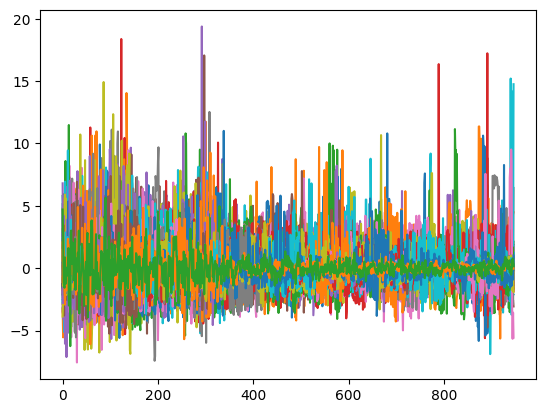

In [30]:
for i in range(len(rb.basis.data)):
    plt.plot(rb.basis.data[i])
plt.show()

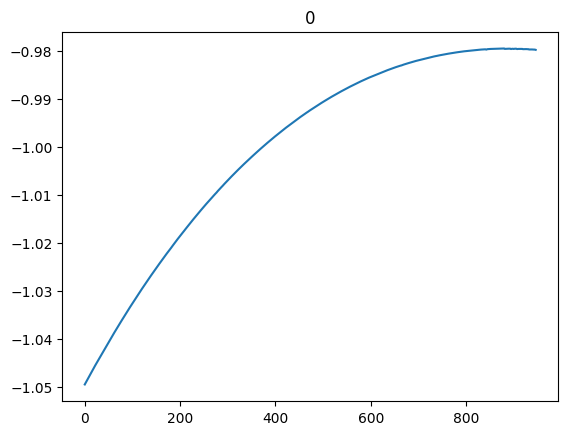

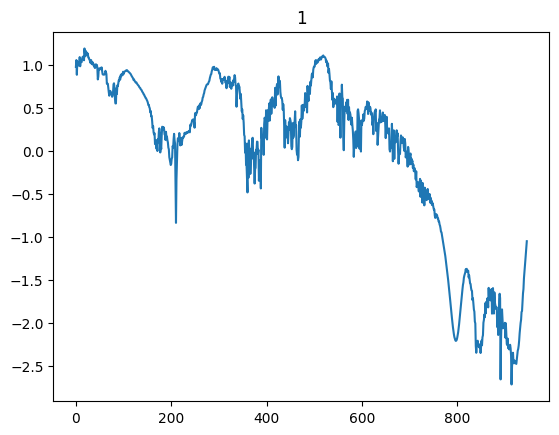

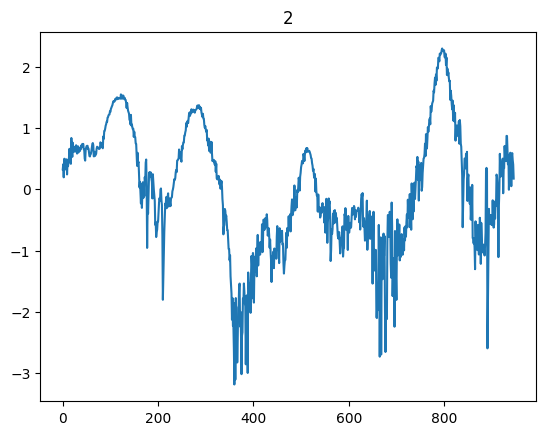

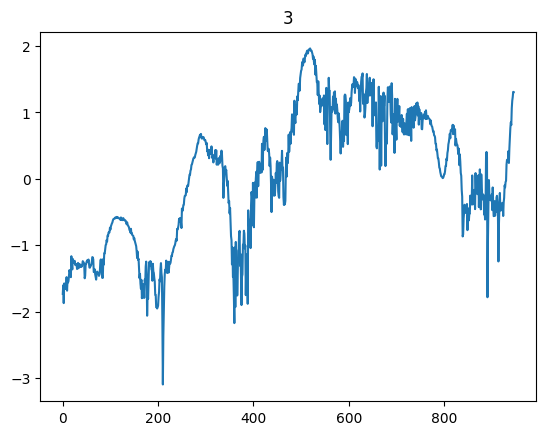

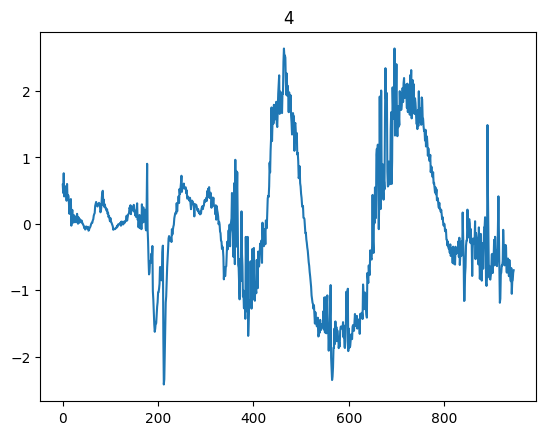

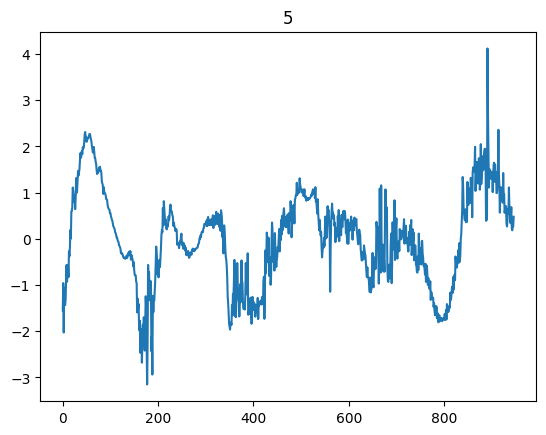

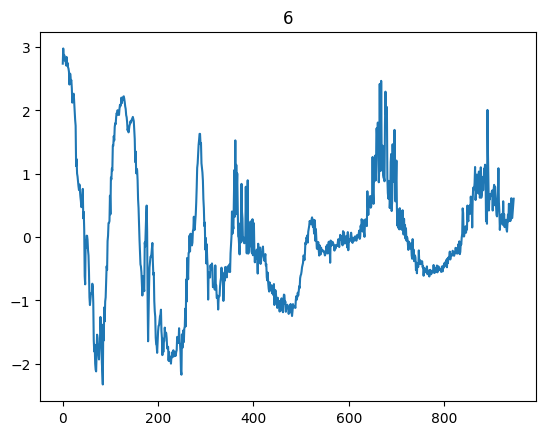

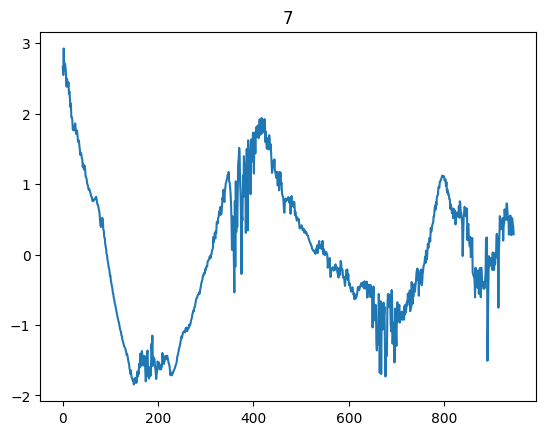

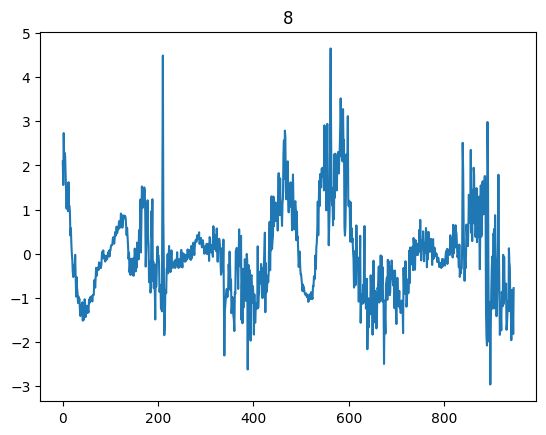

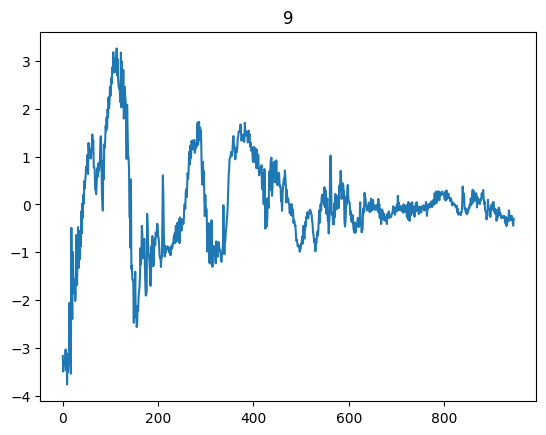

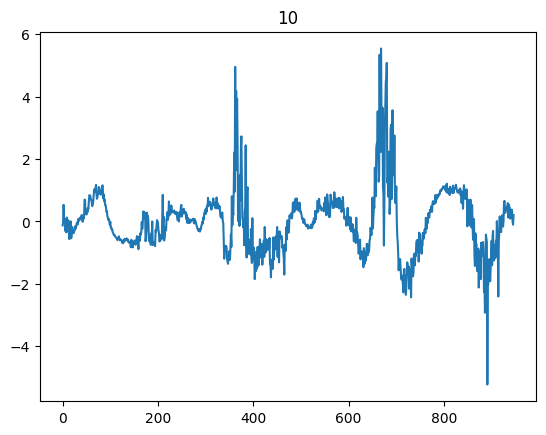

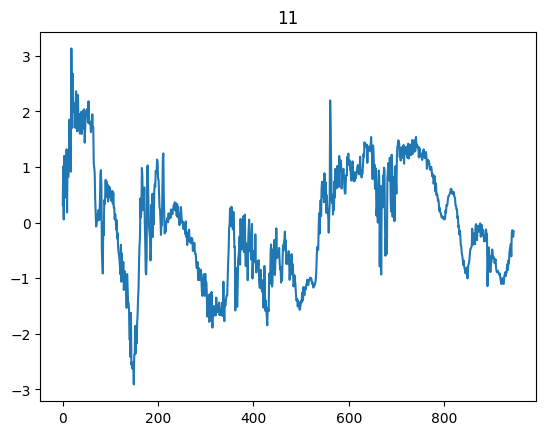

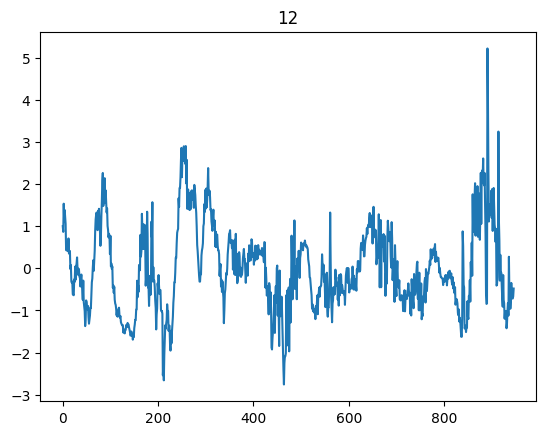

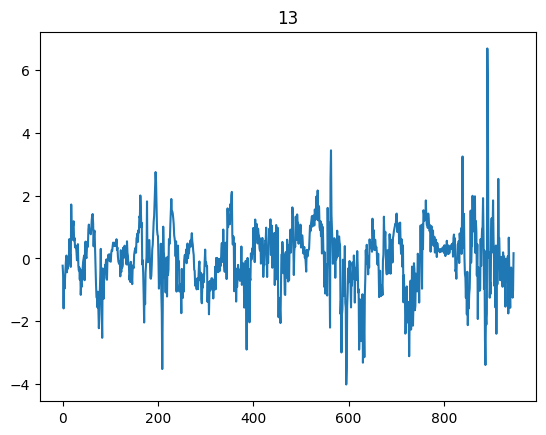

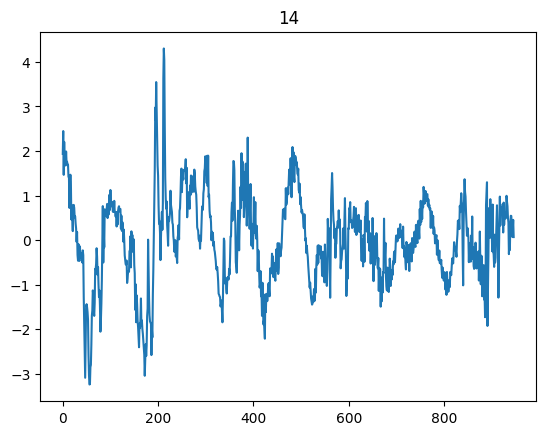

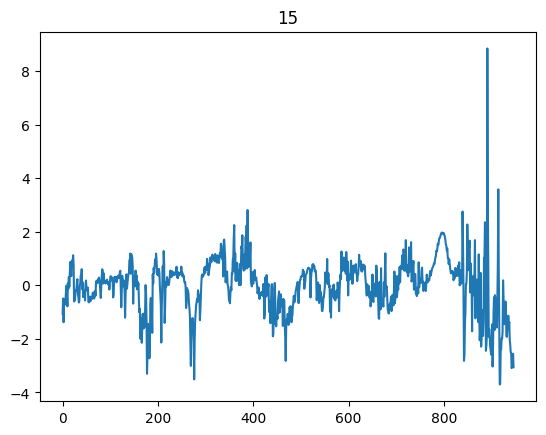

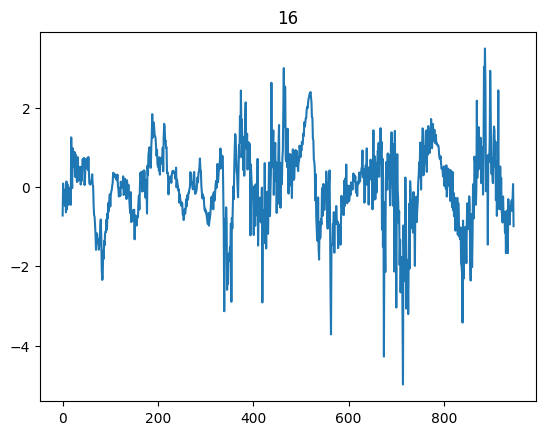

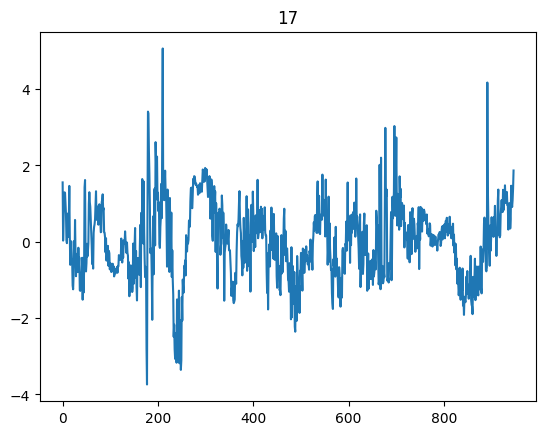

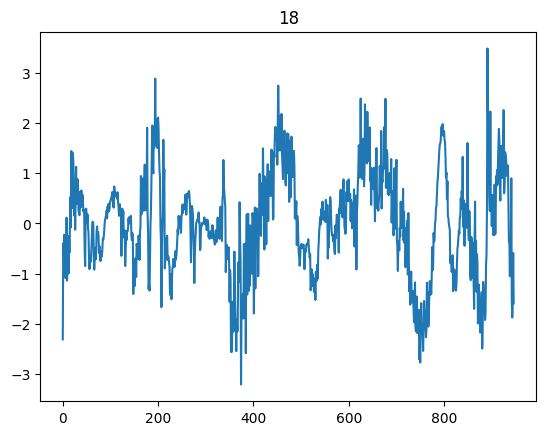

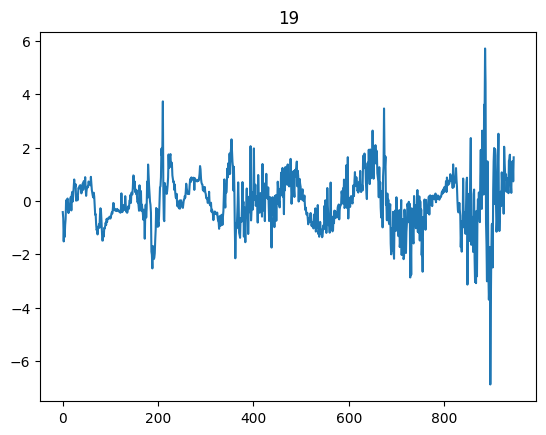

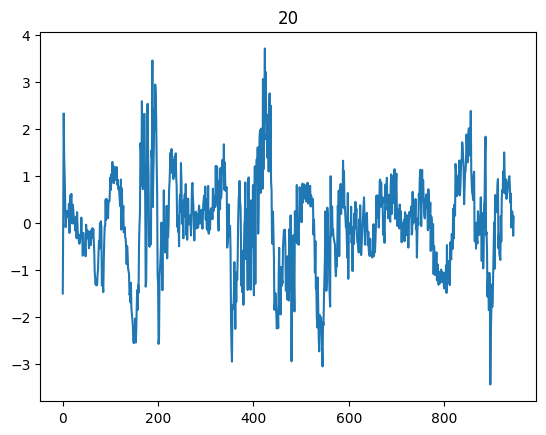

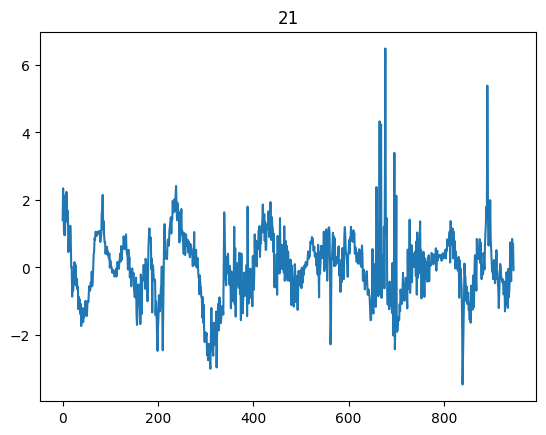

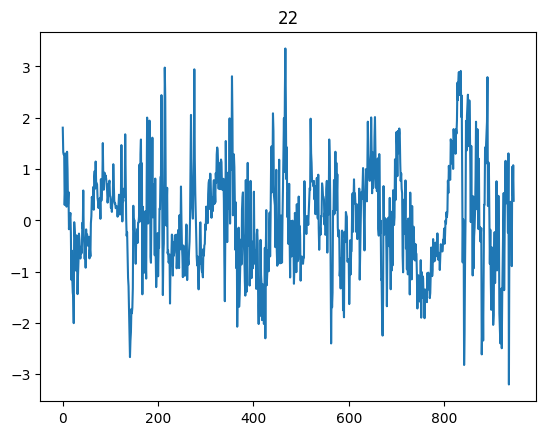

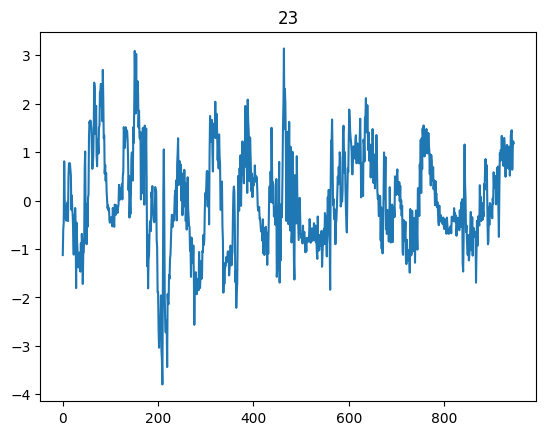

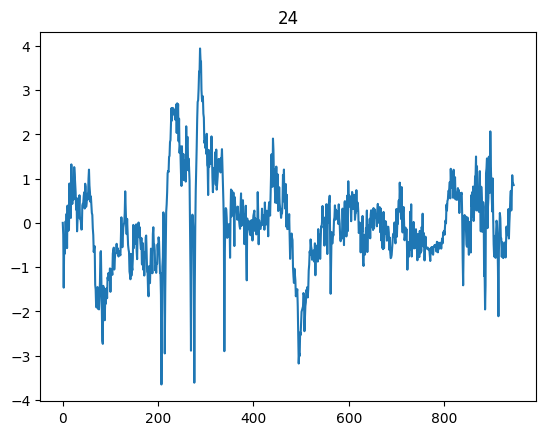

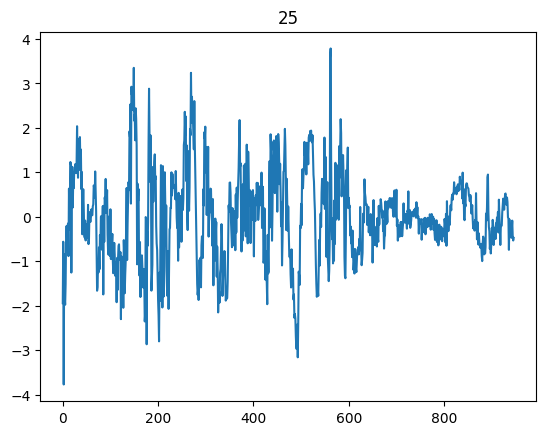

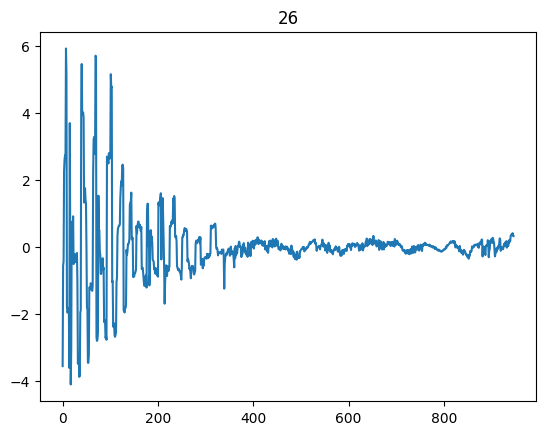

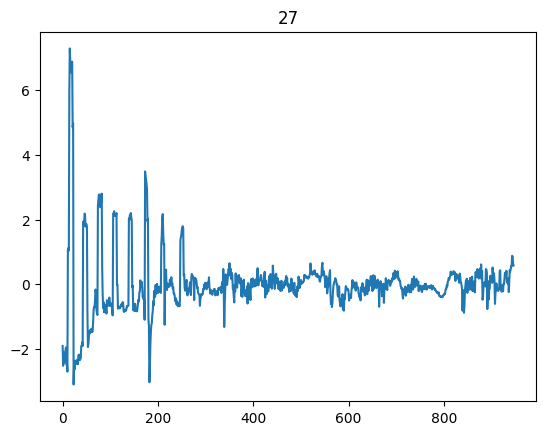

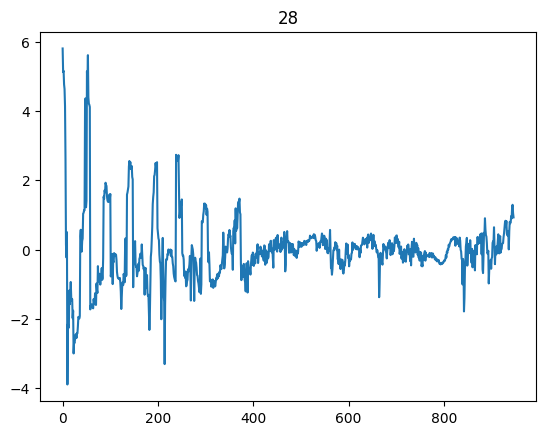

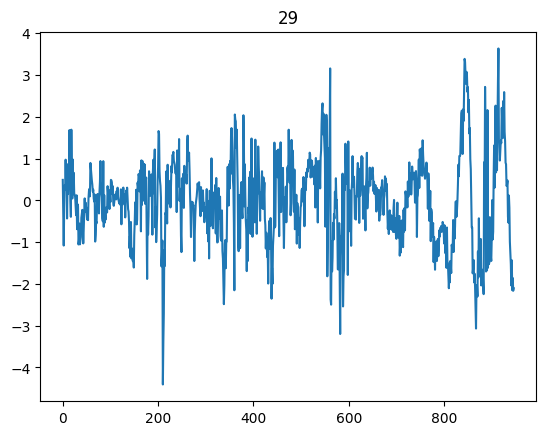

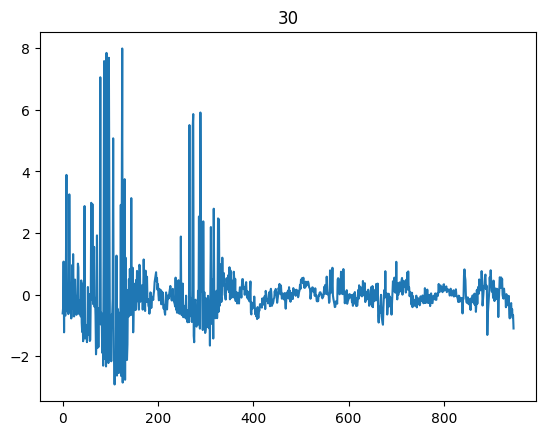

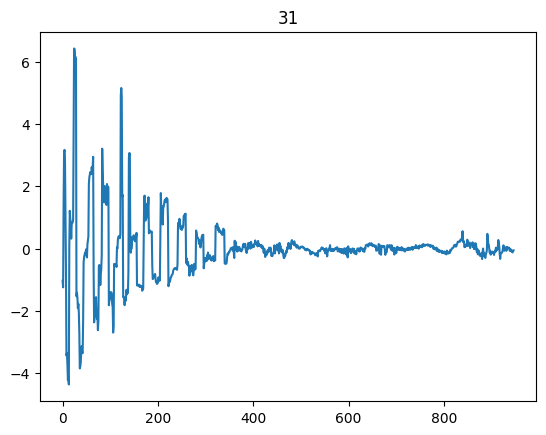

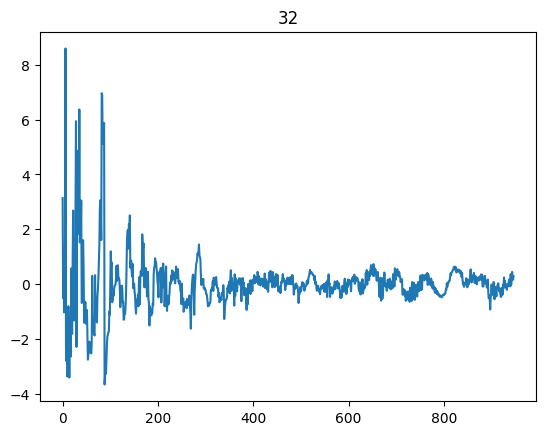

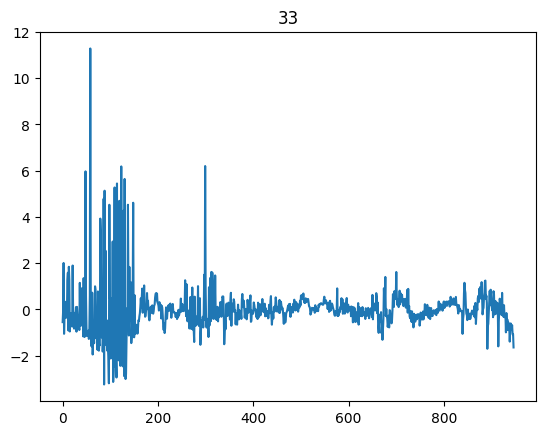

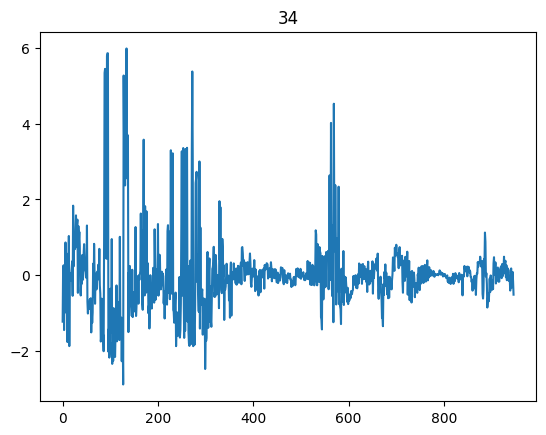

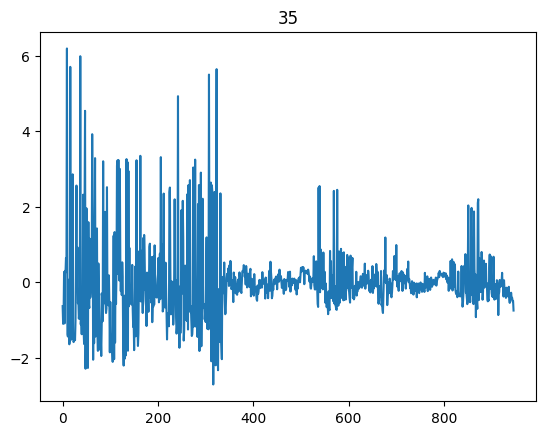

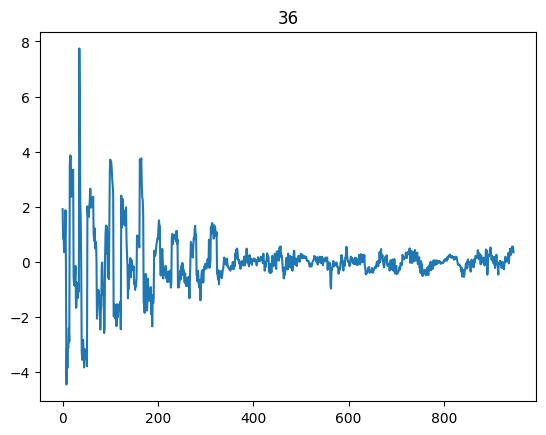

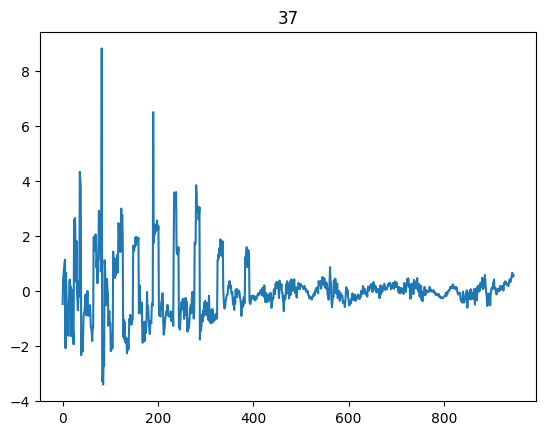

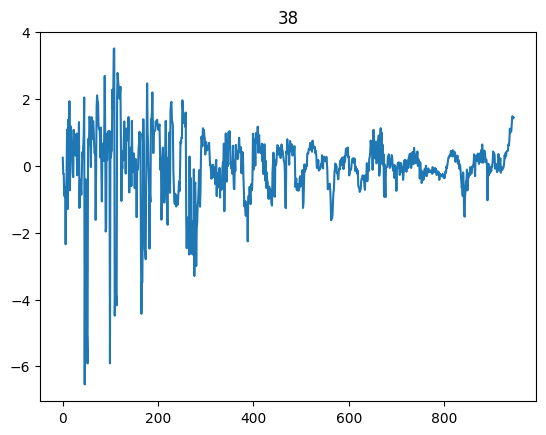

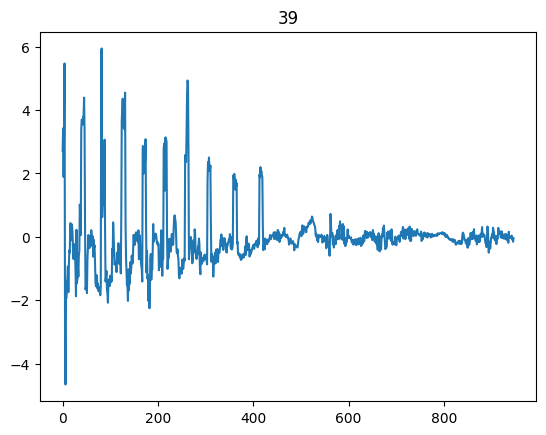

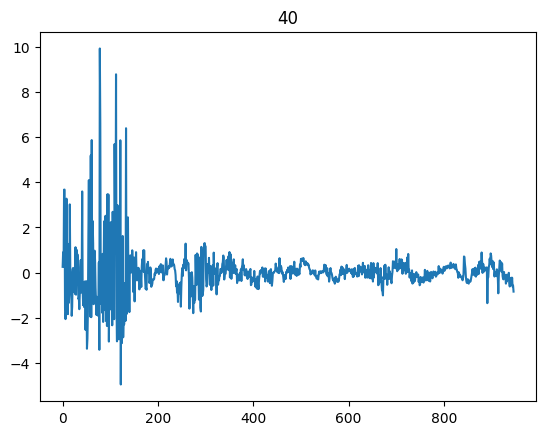

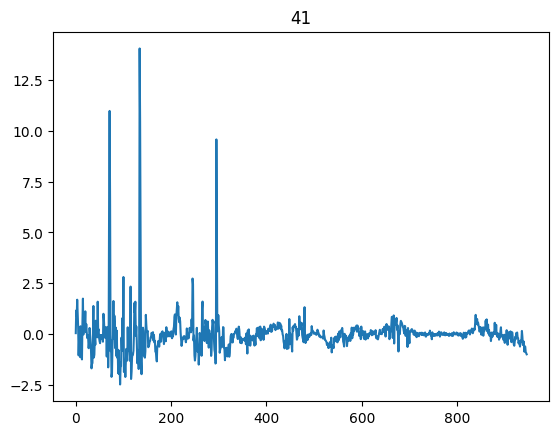

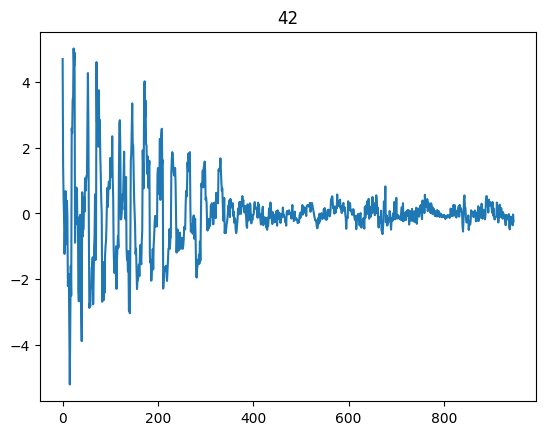

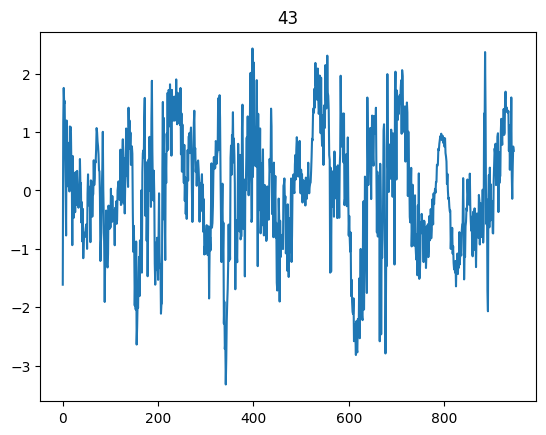

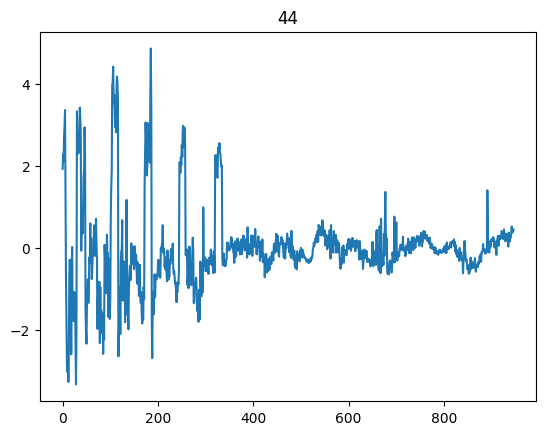

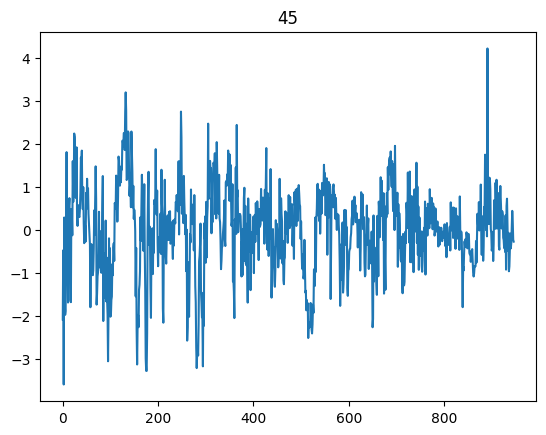

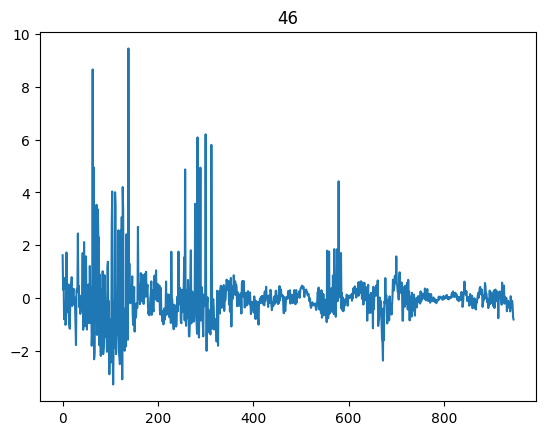

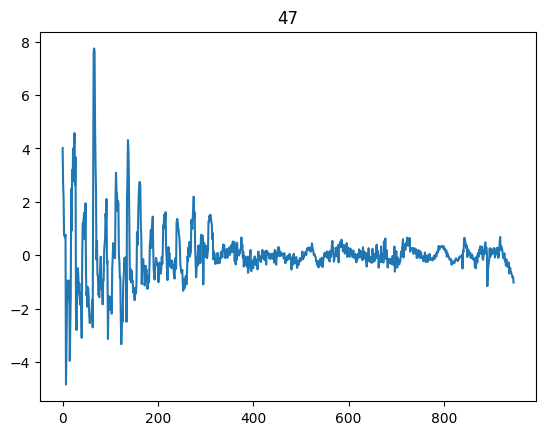

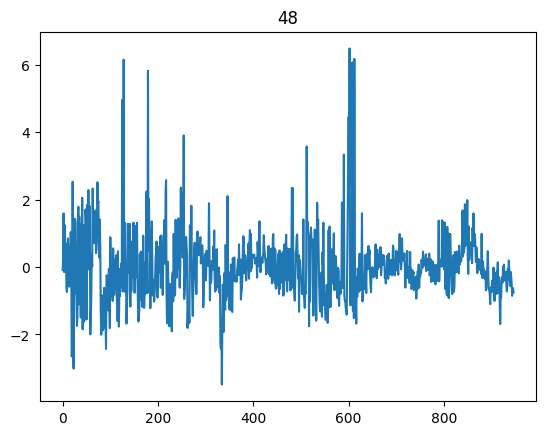

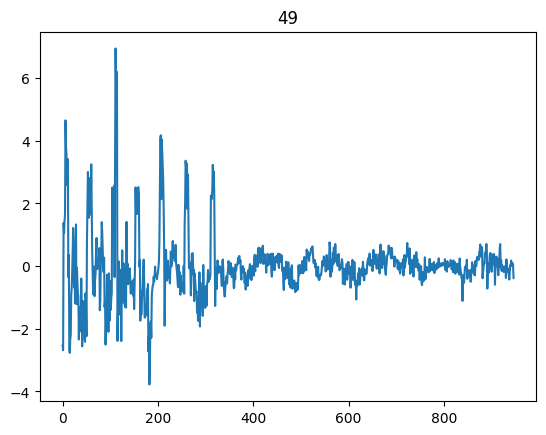

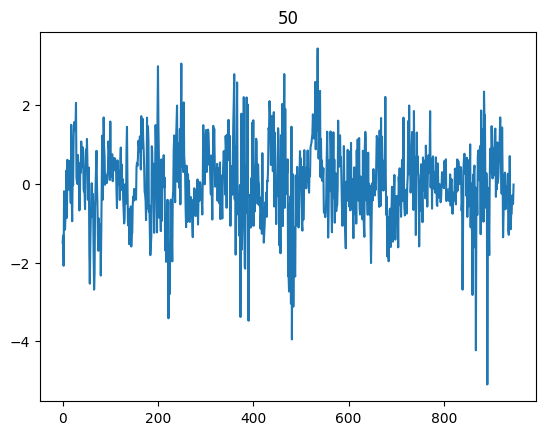

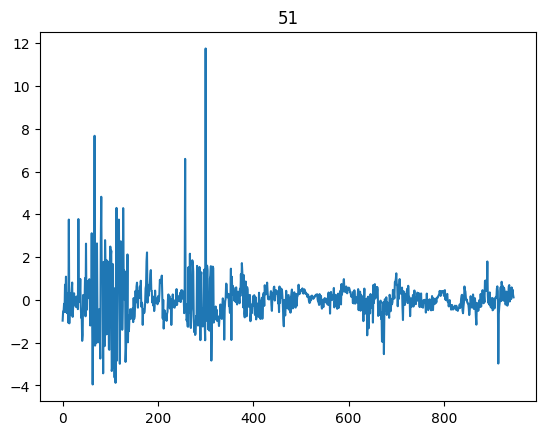

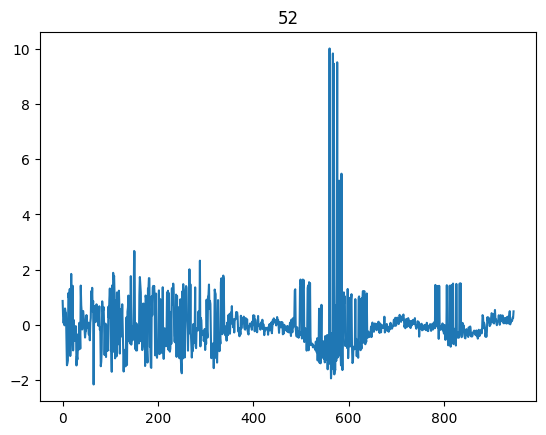

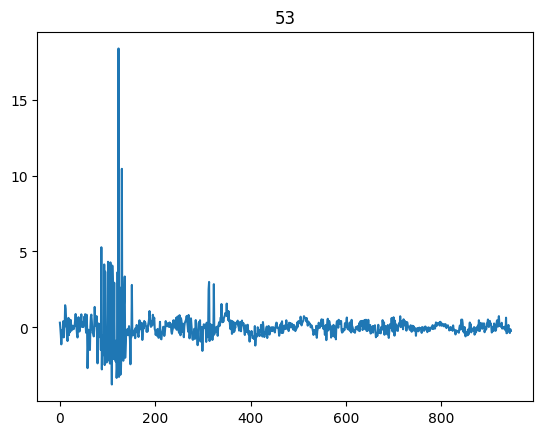

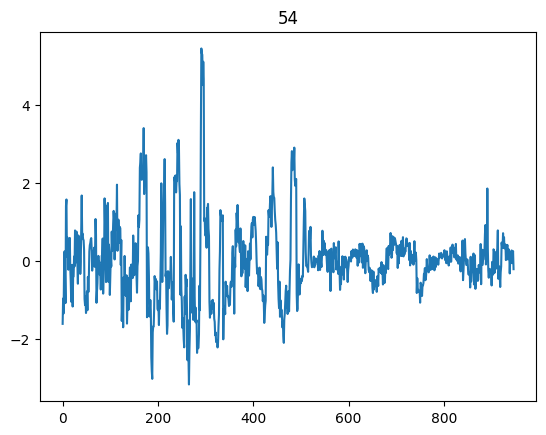

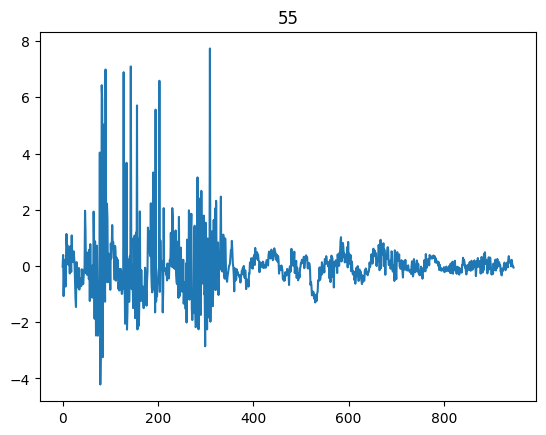

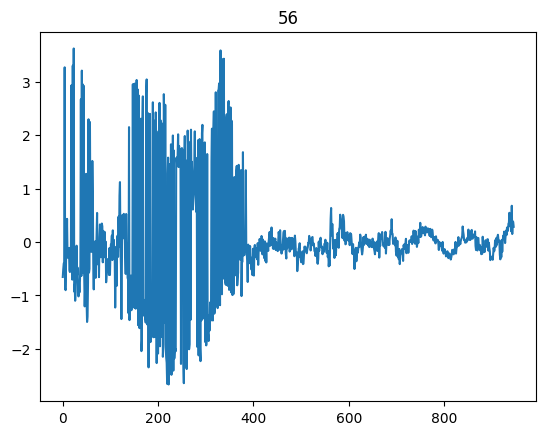

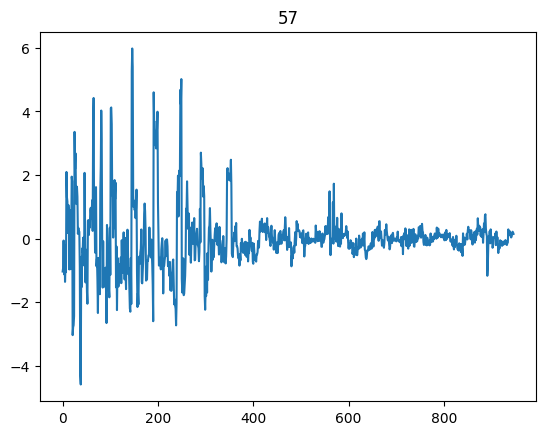

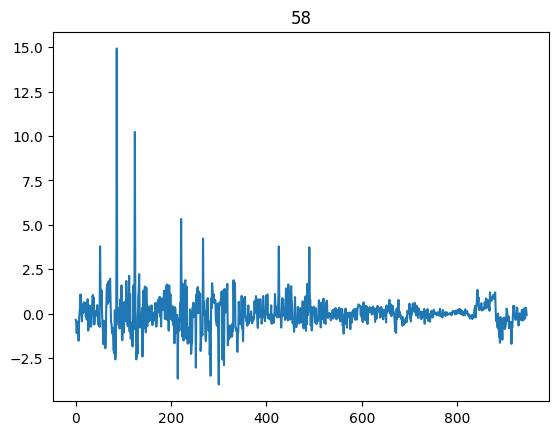

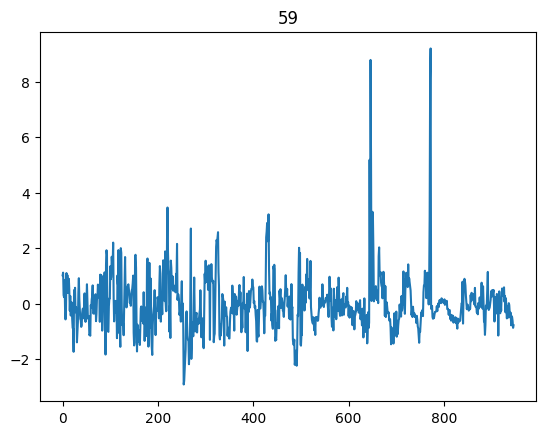

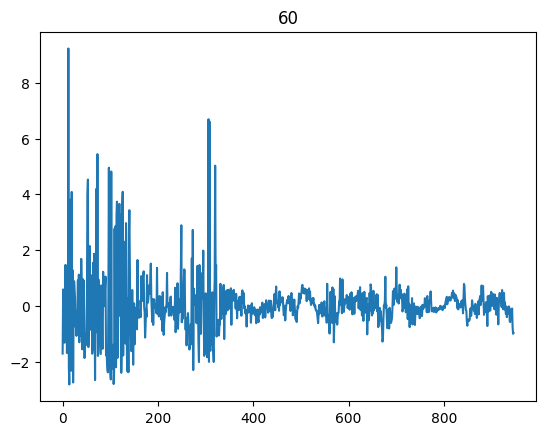

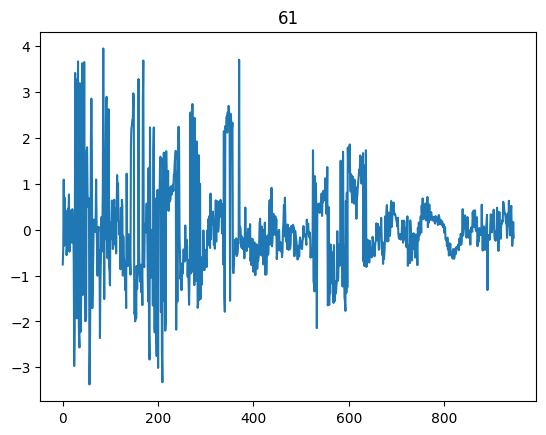

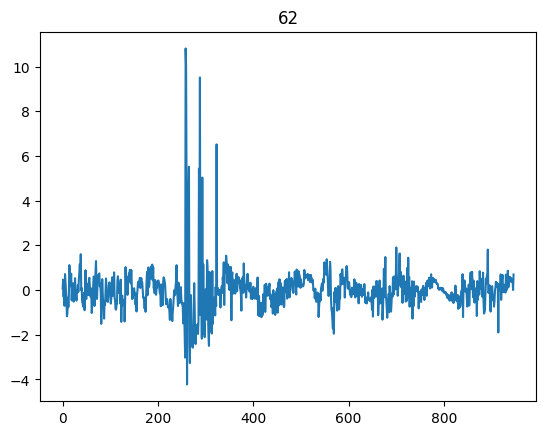

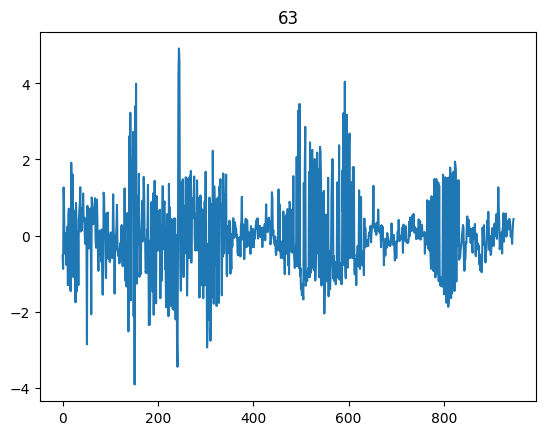

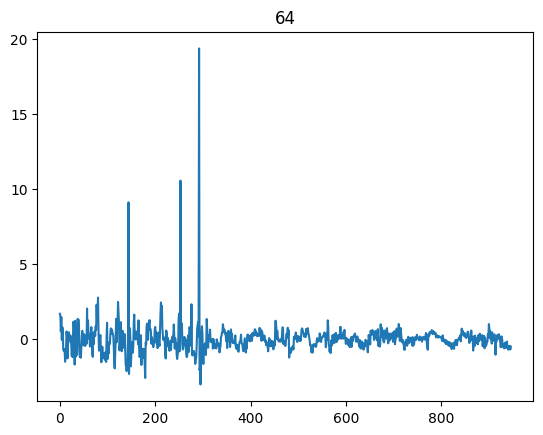

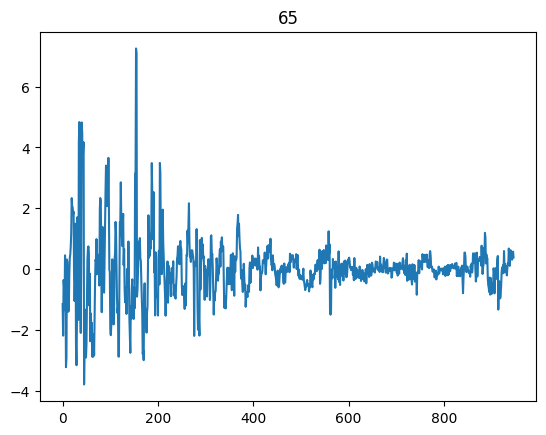

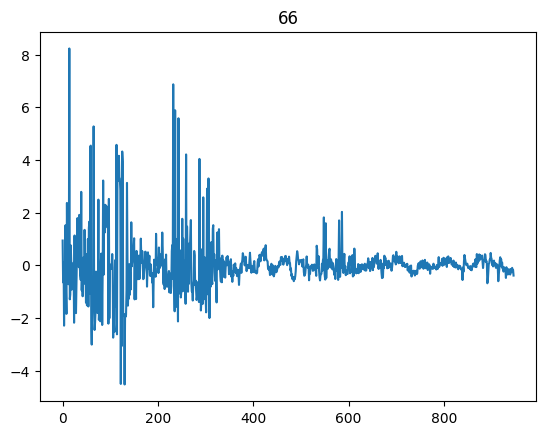

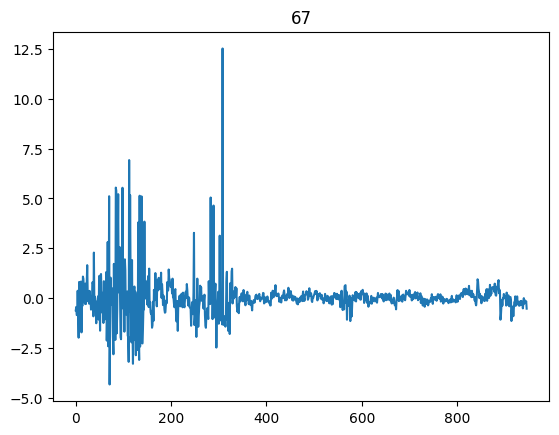

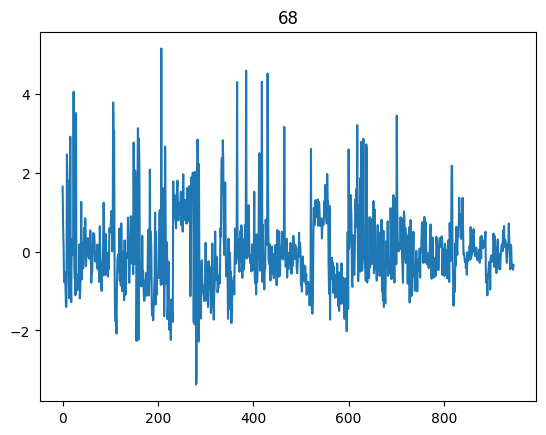

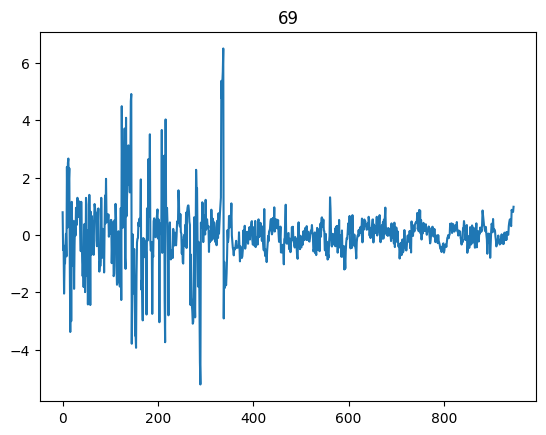

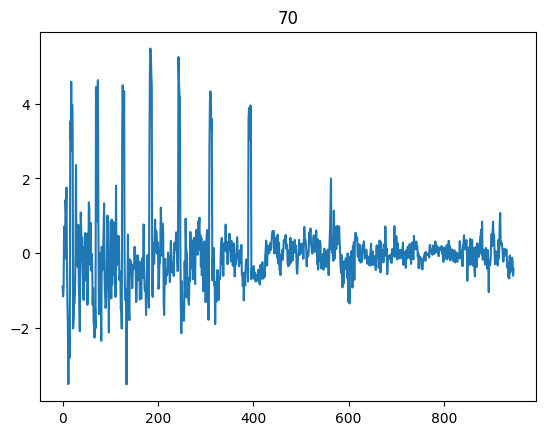

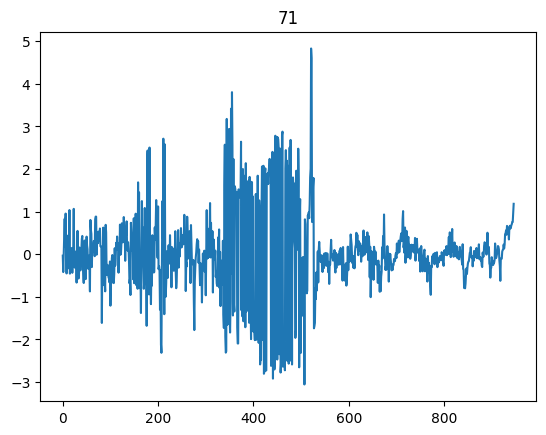

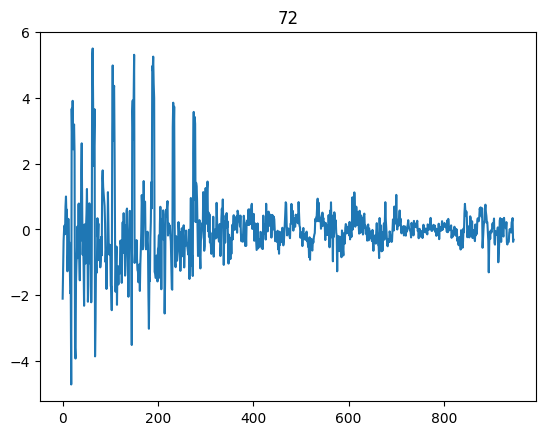

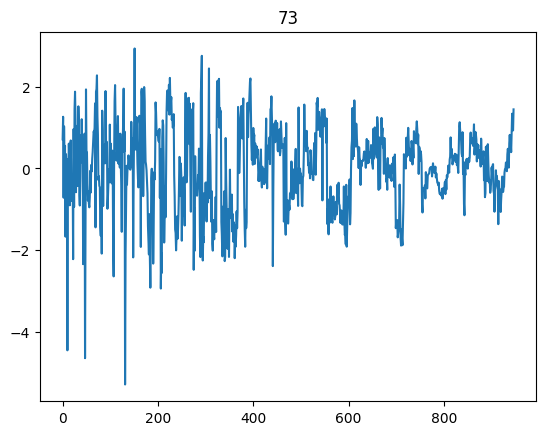

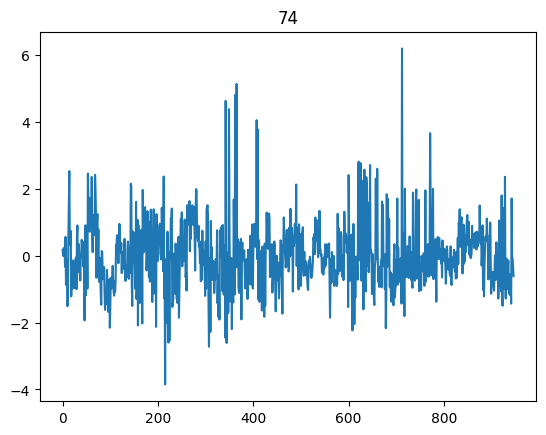

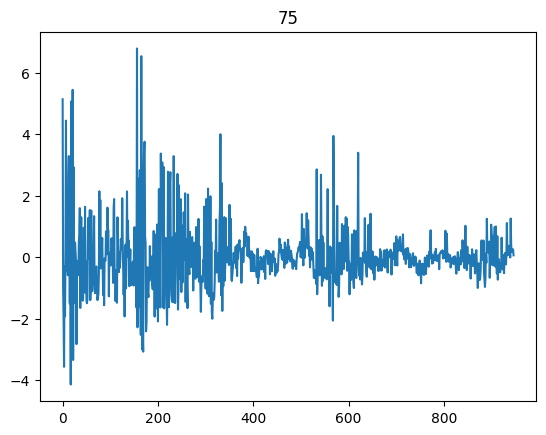

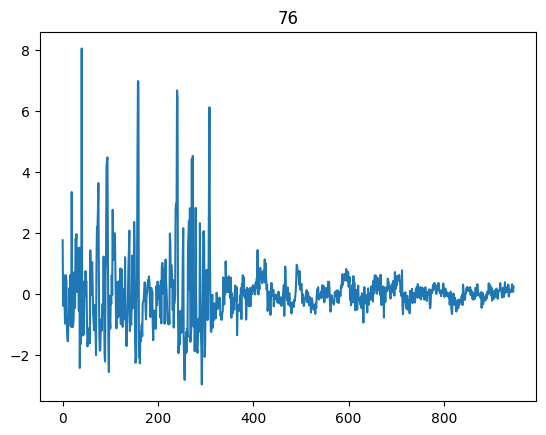

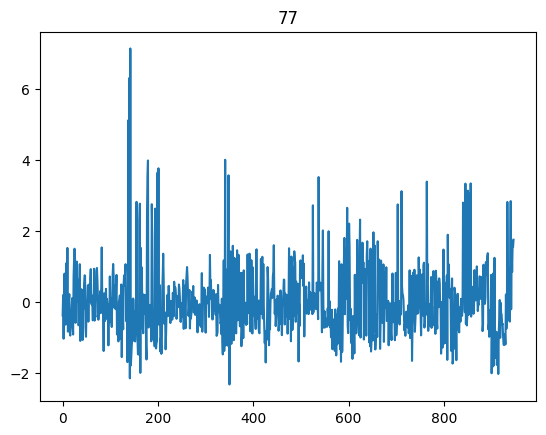

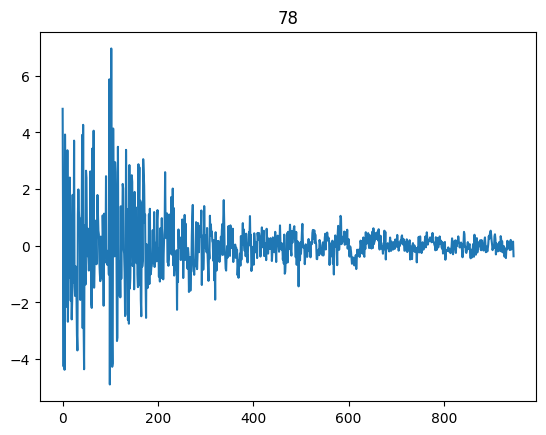

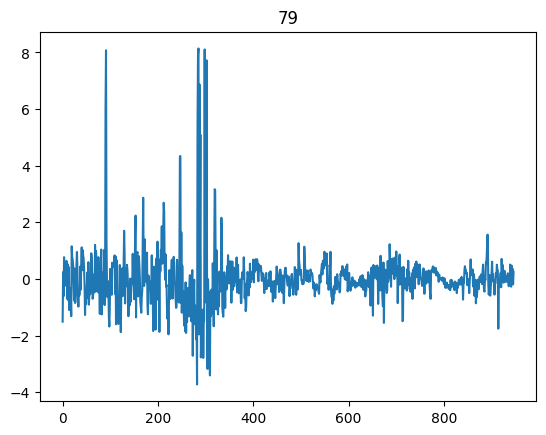

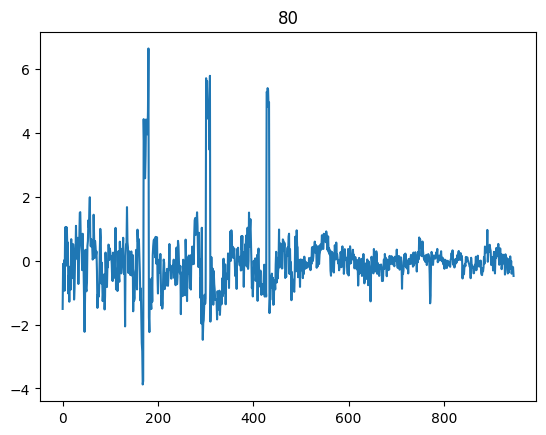

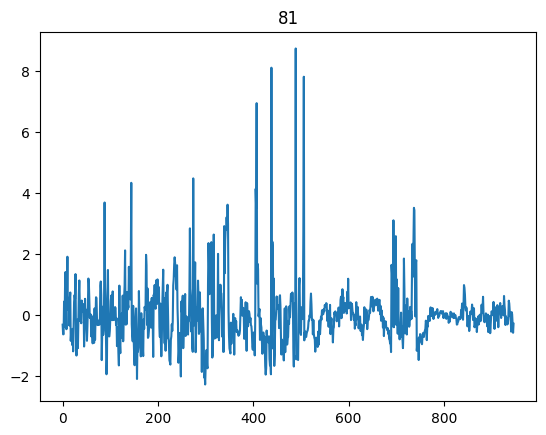

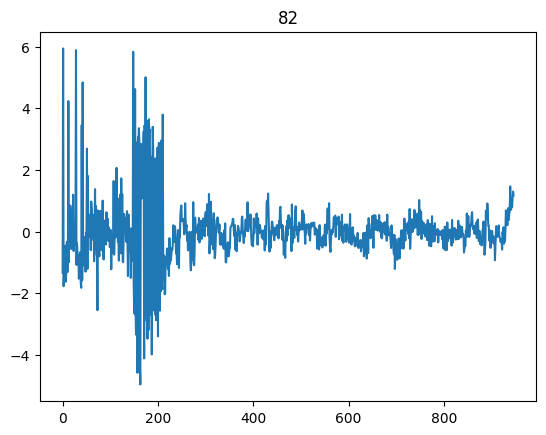

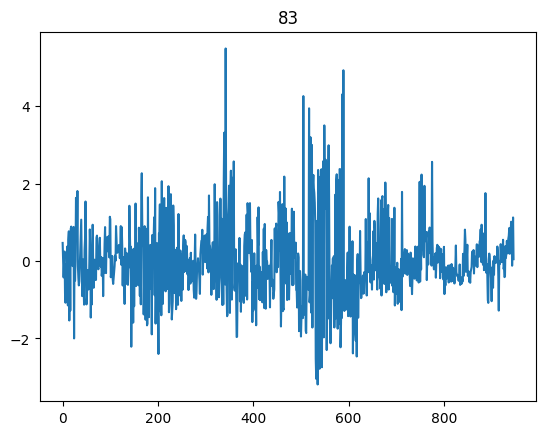

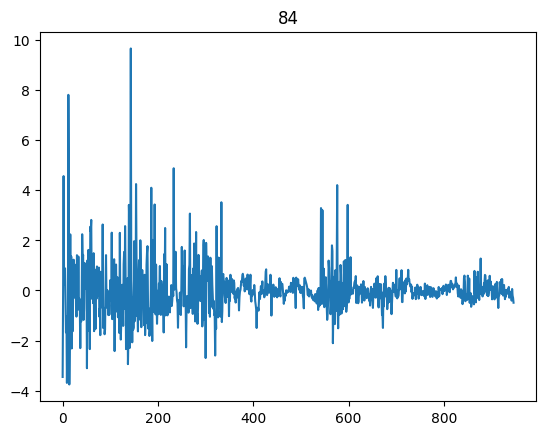

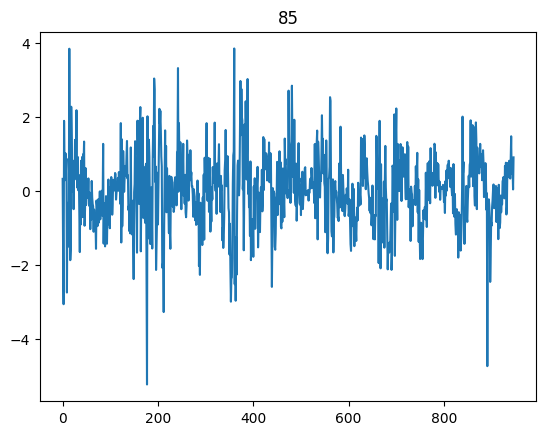

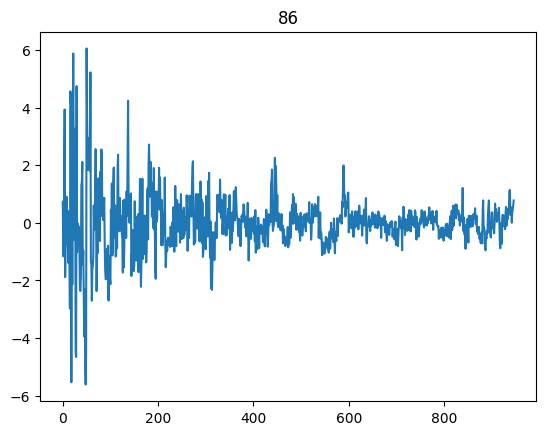

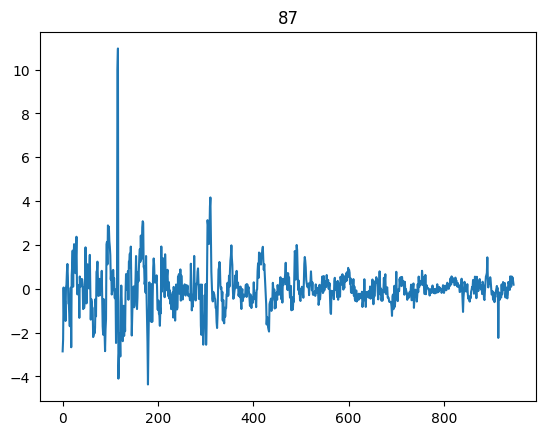

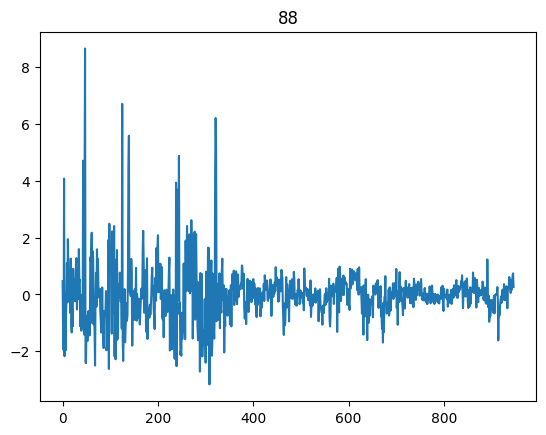

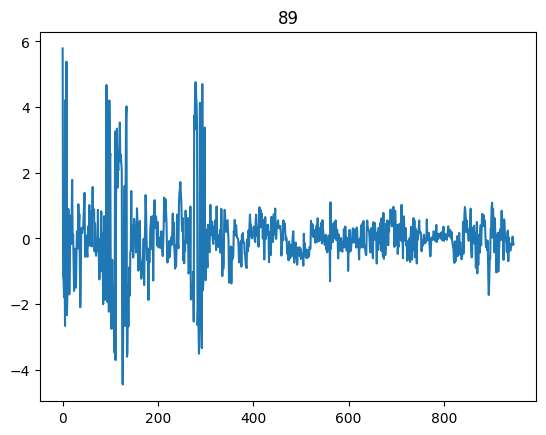

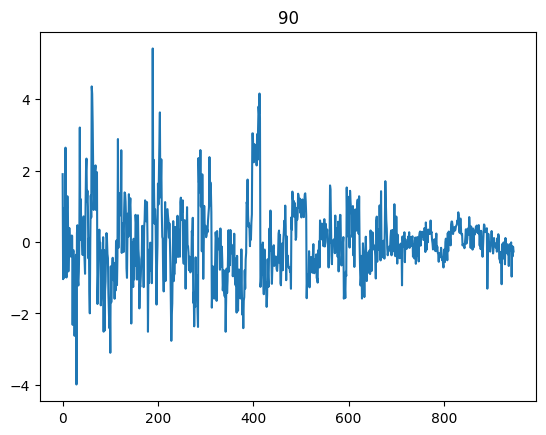

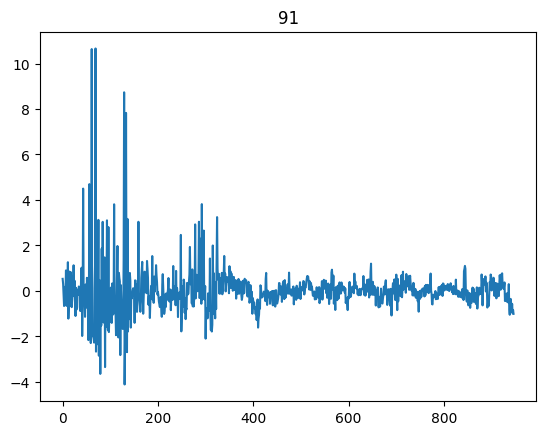

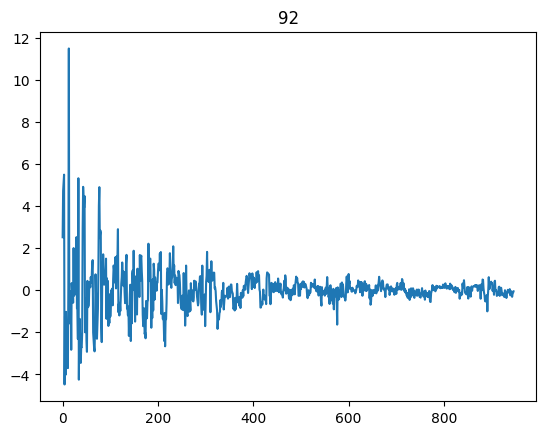

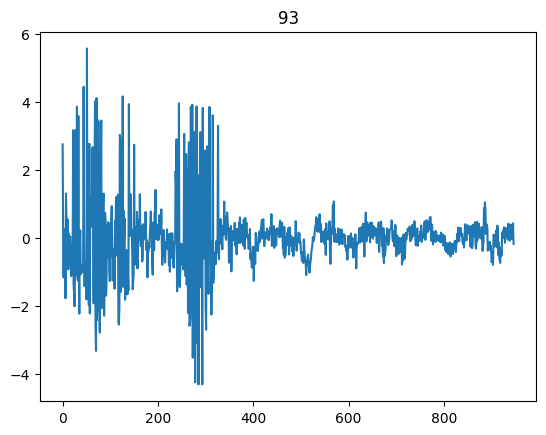

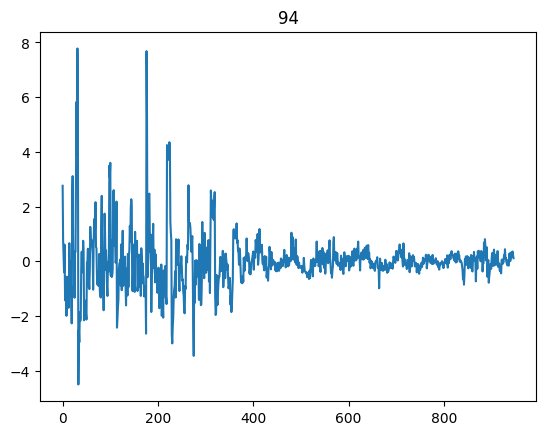

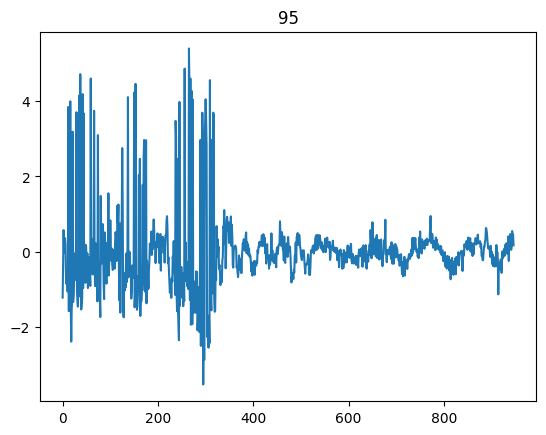

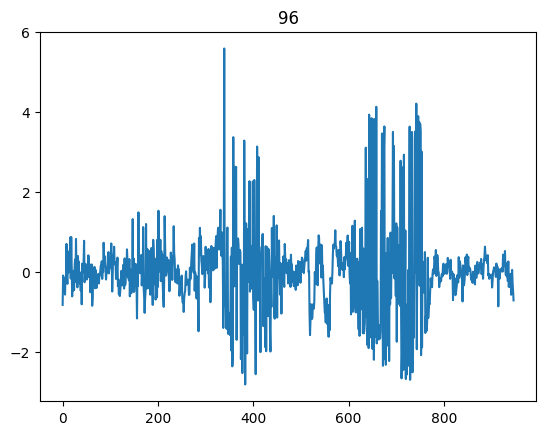

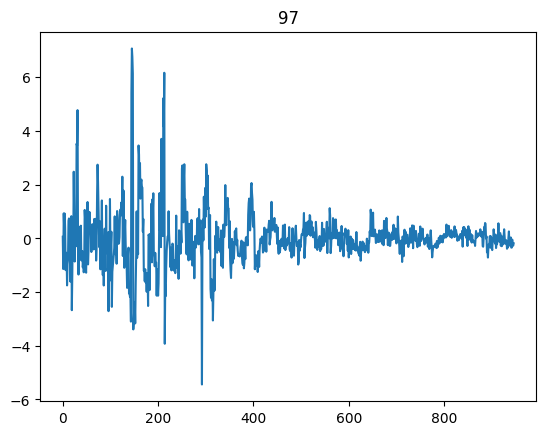

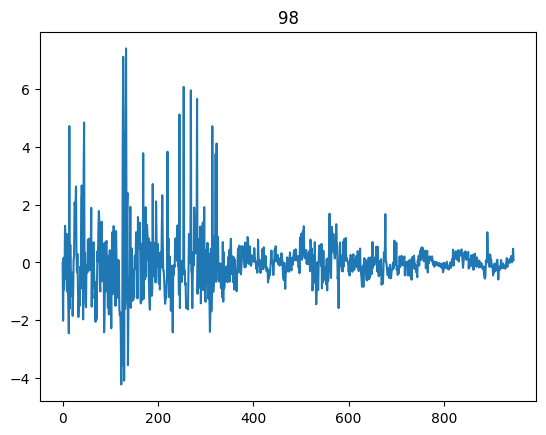

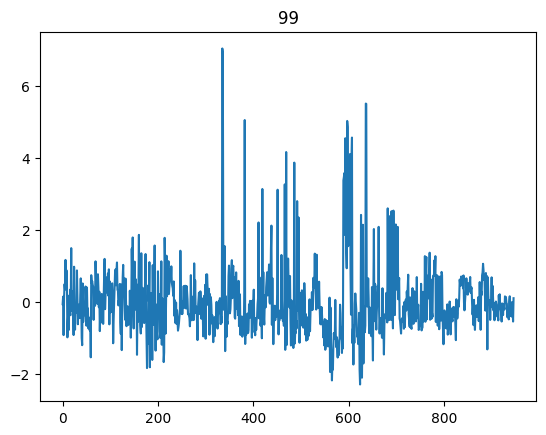

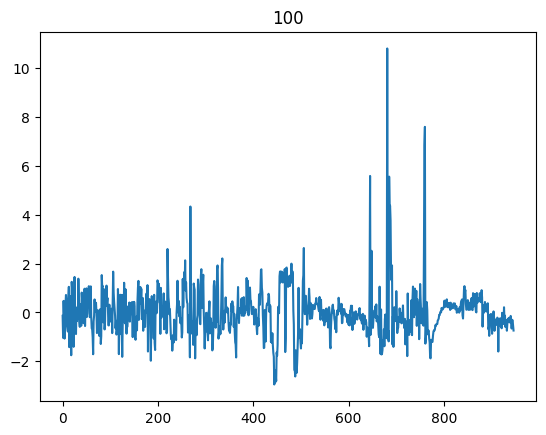

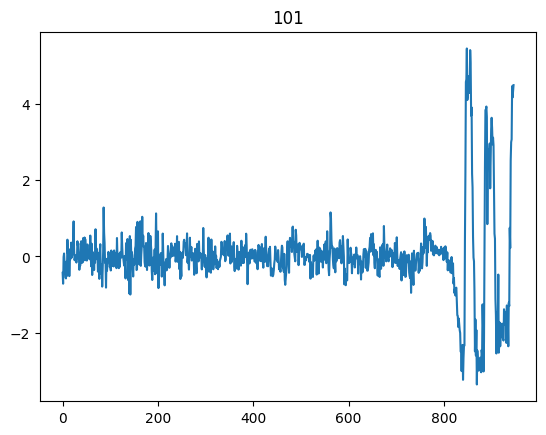

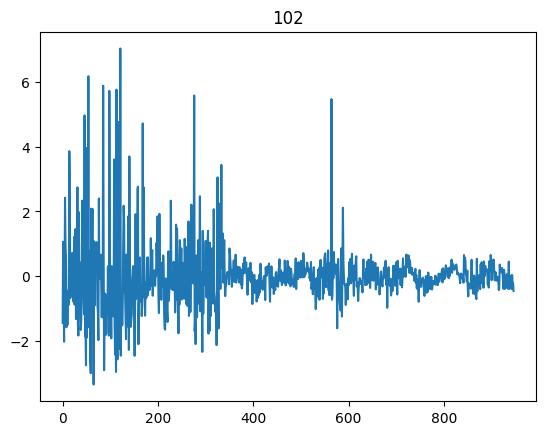

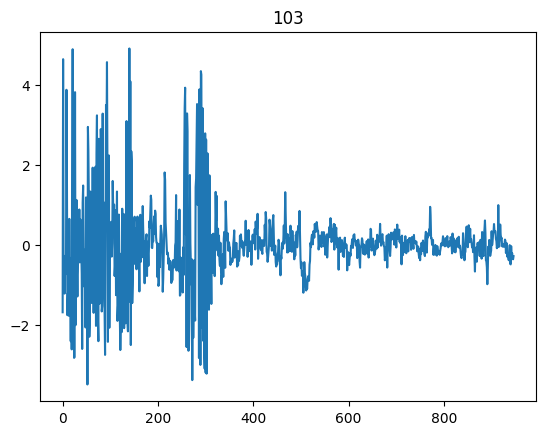

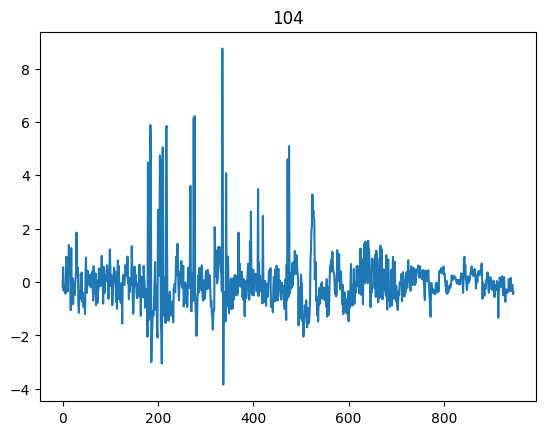

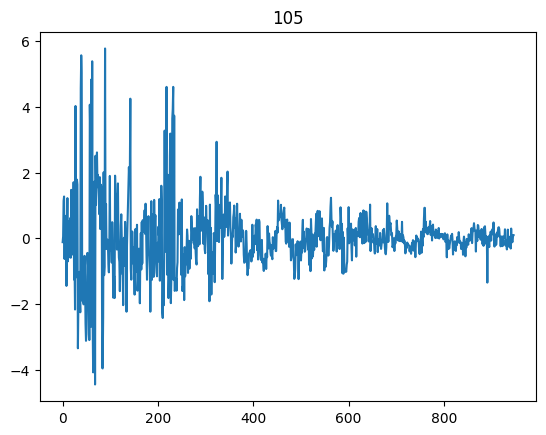

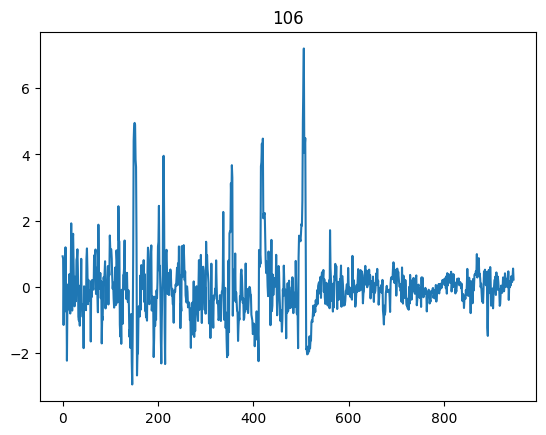

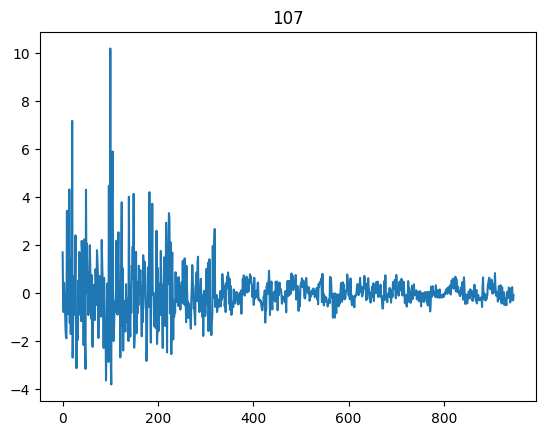

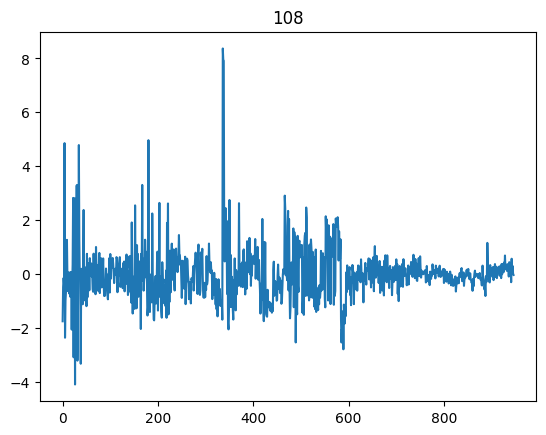

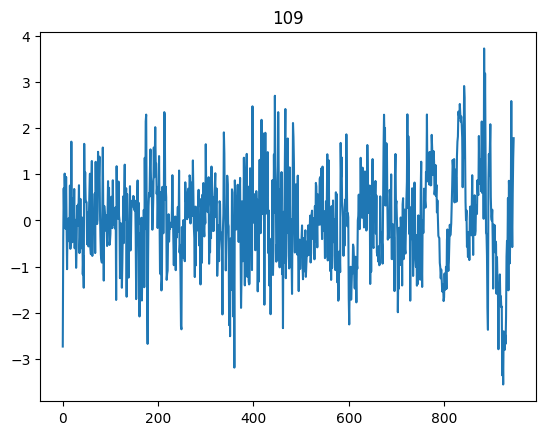

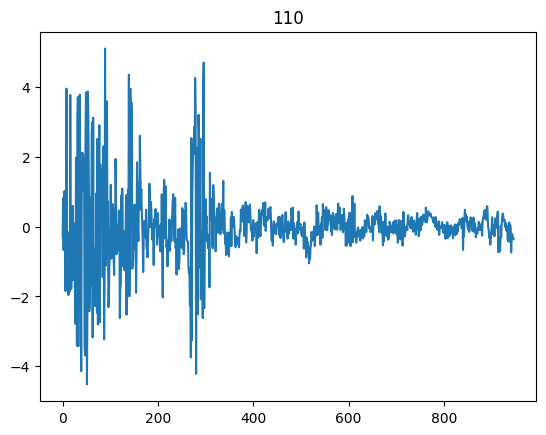

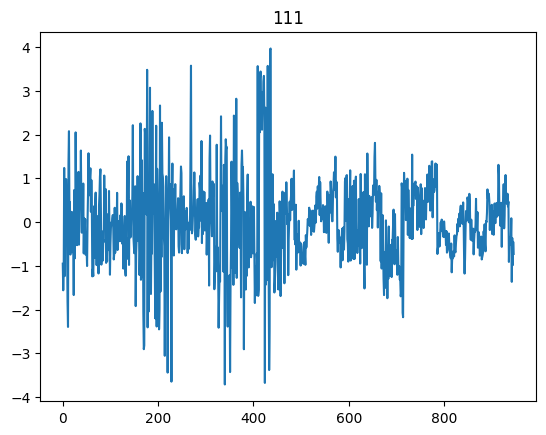

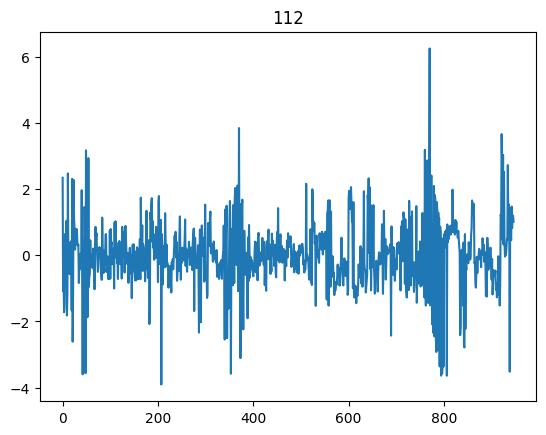

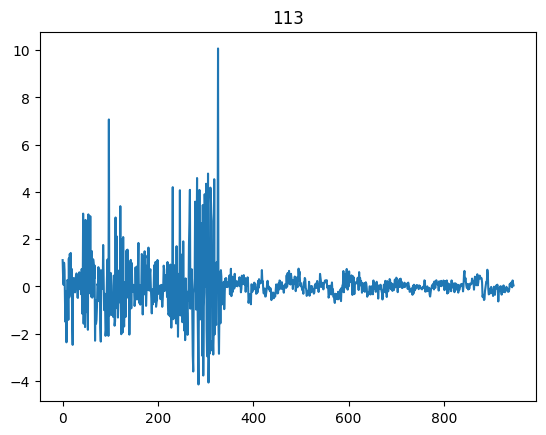

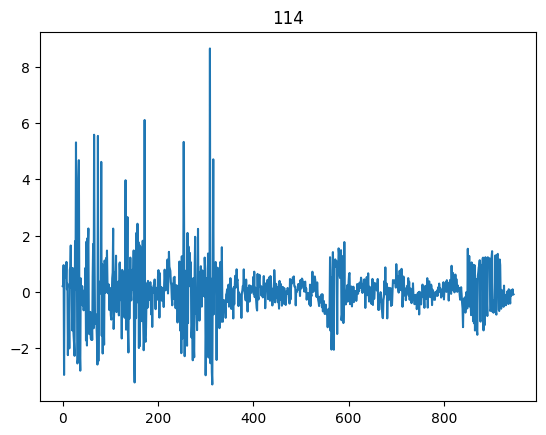

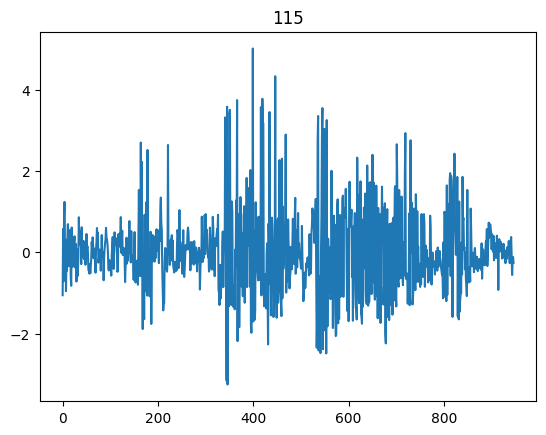

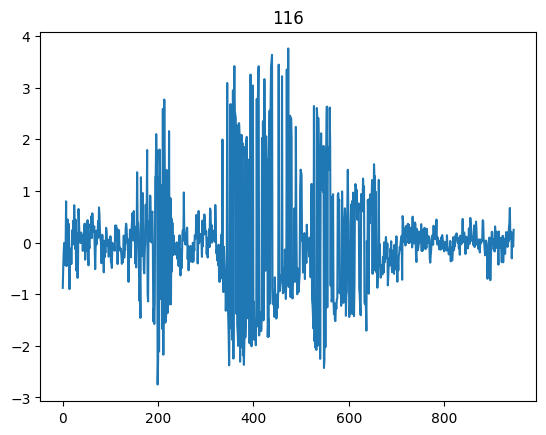

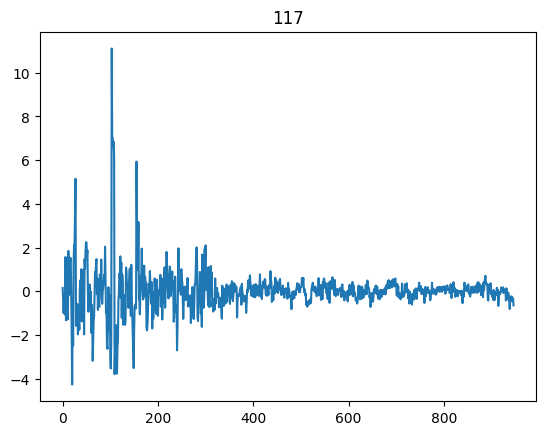

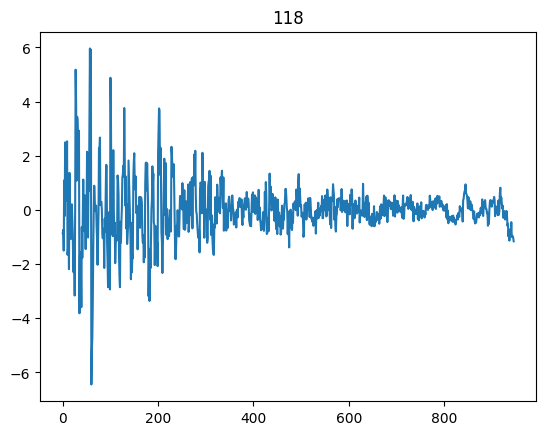

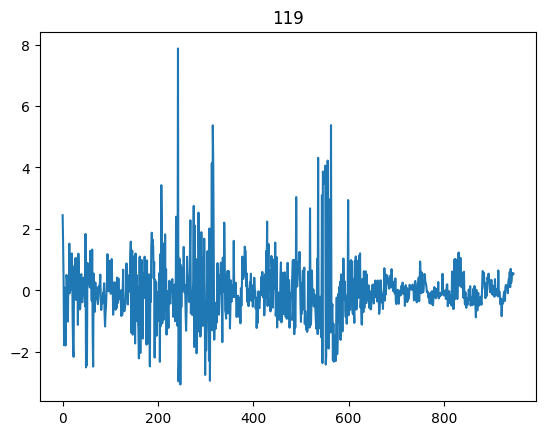

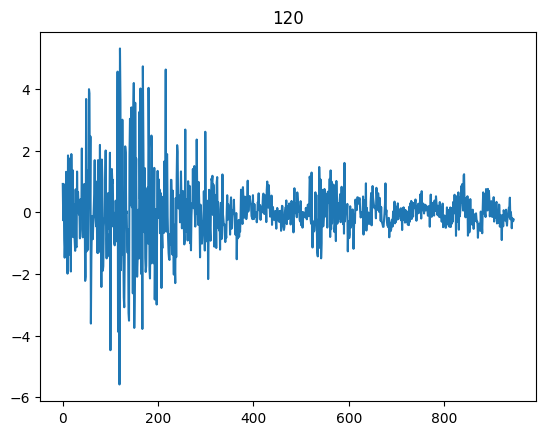

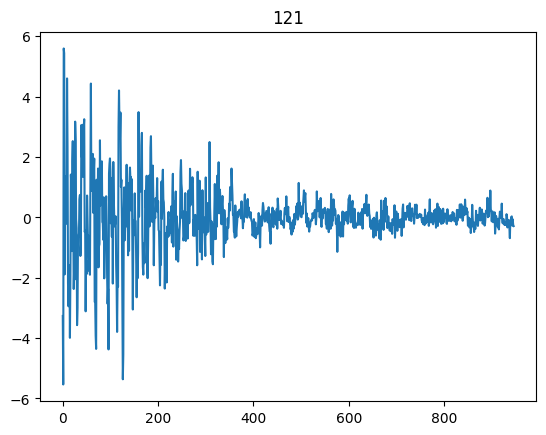

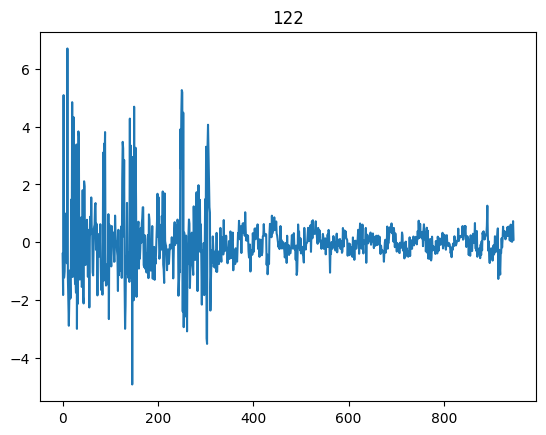

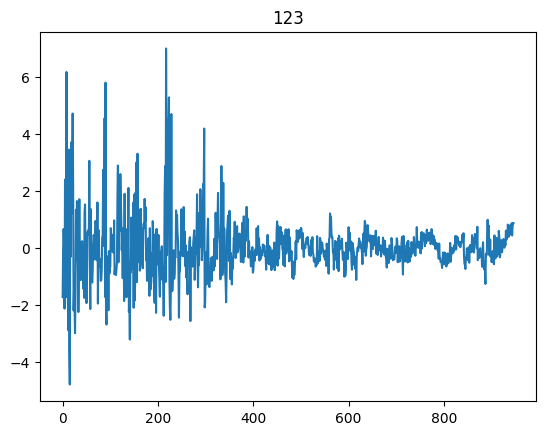

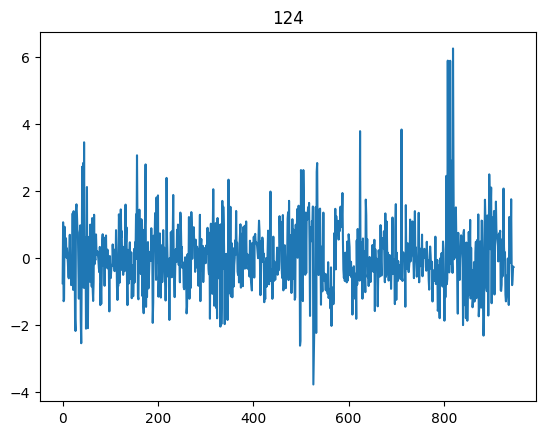

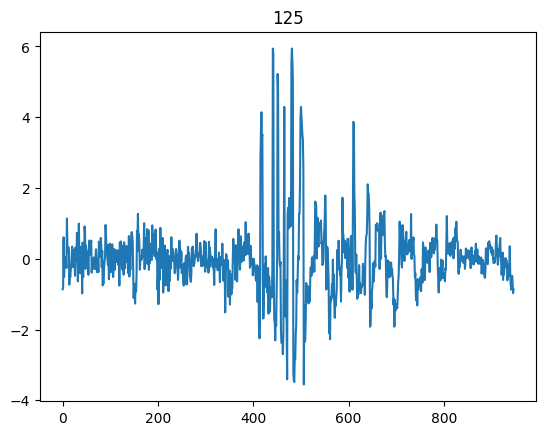

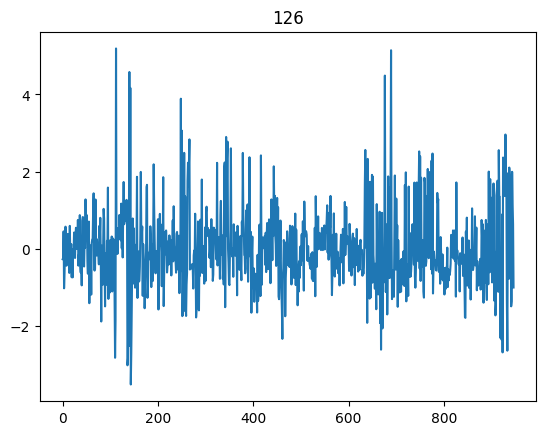

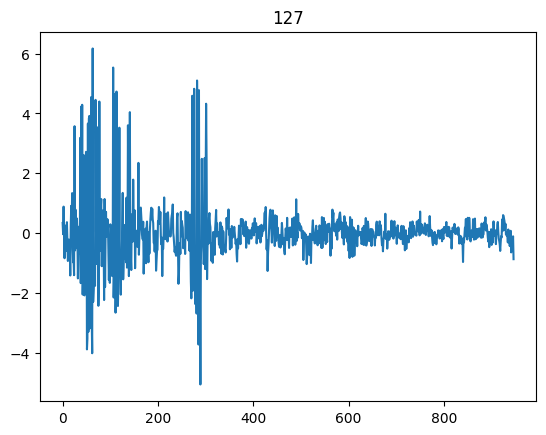

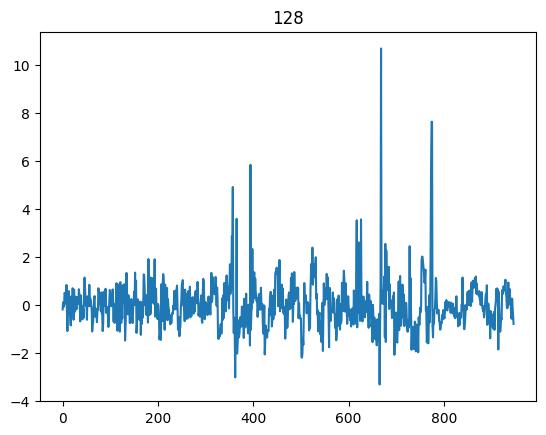

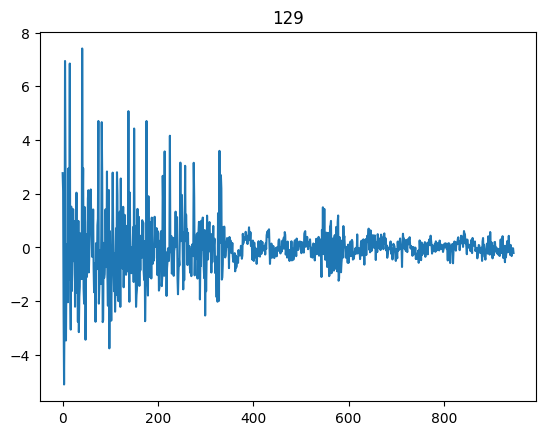

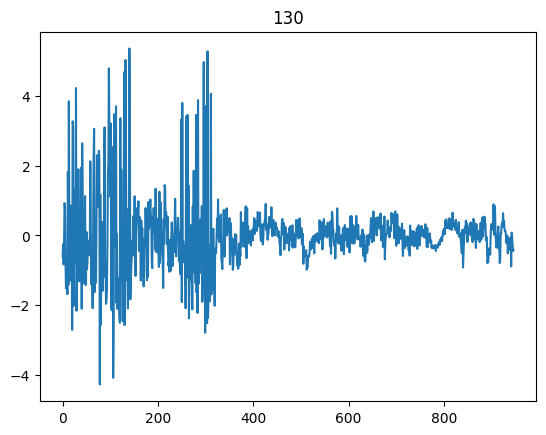

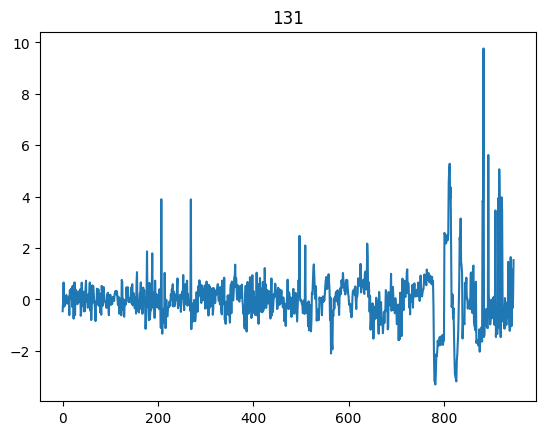

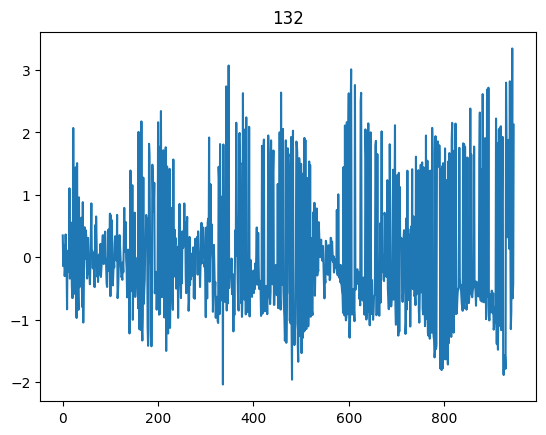

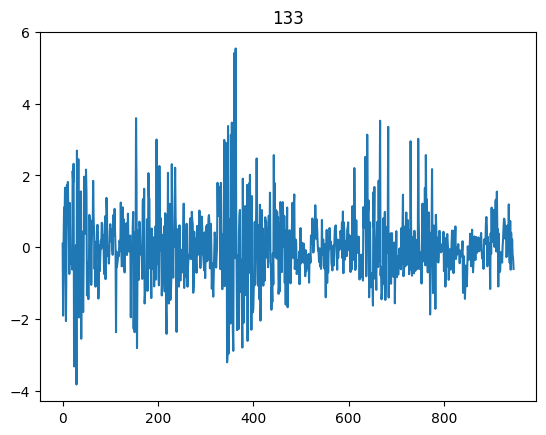

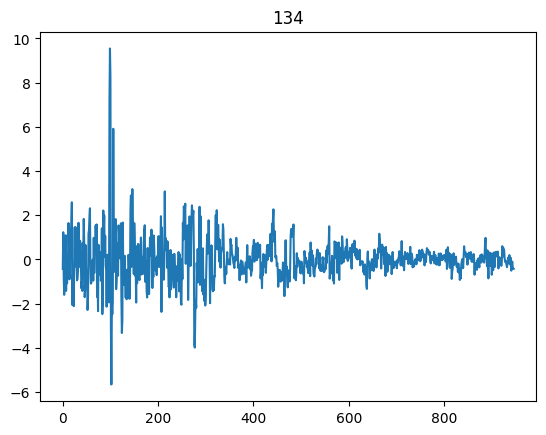

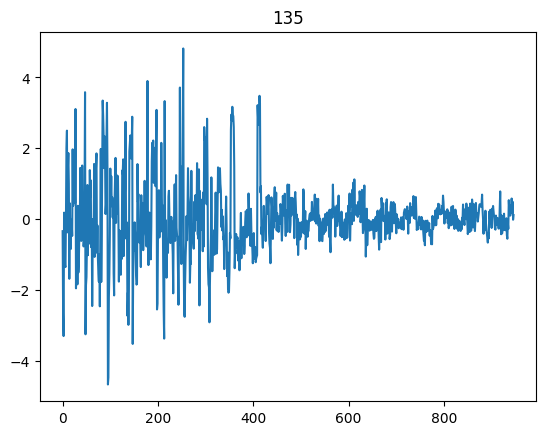

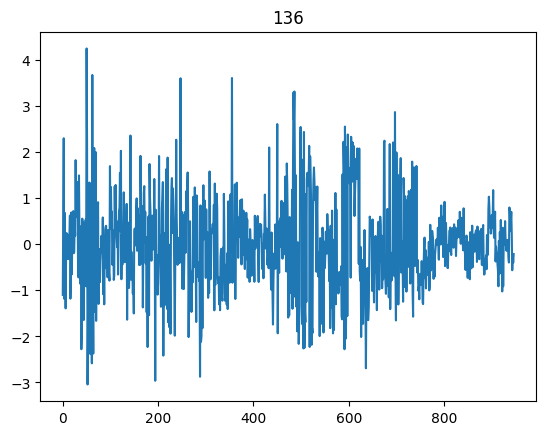

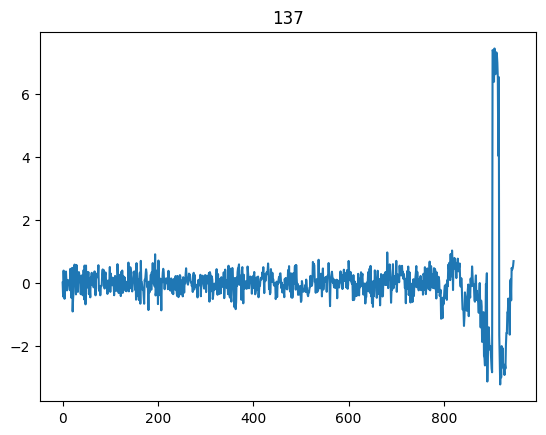

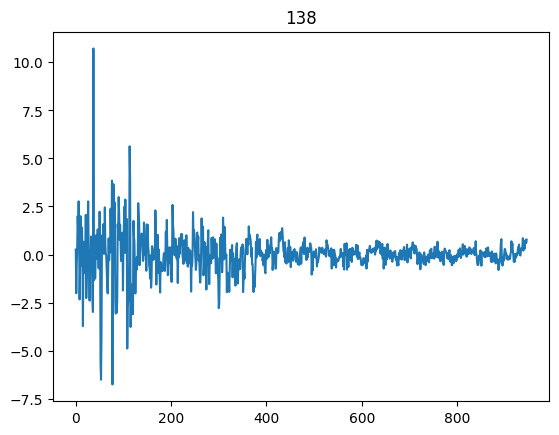

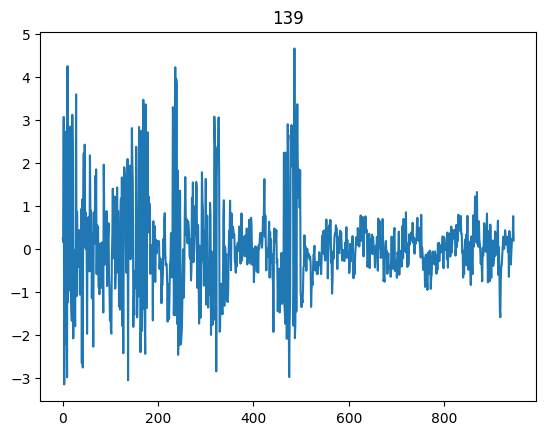

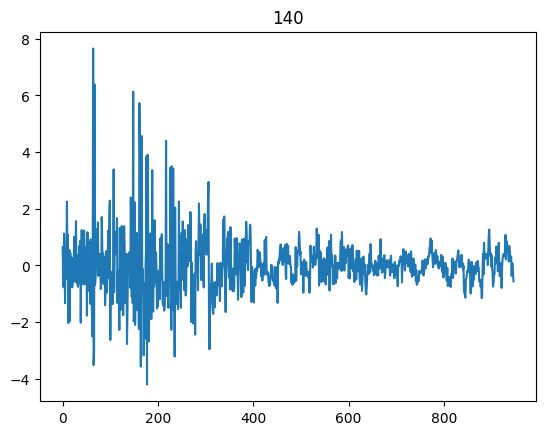

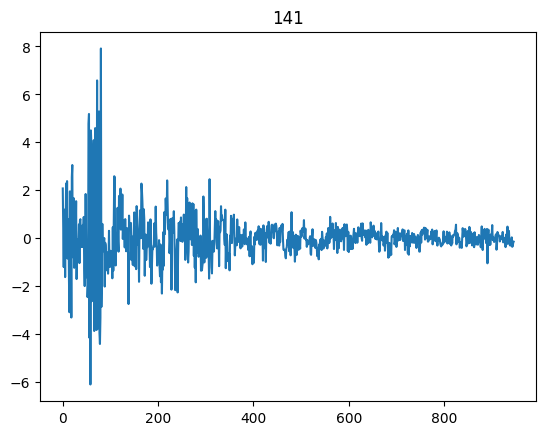

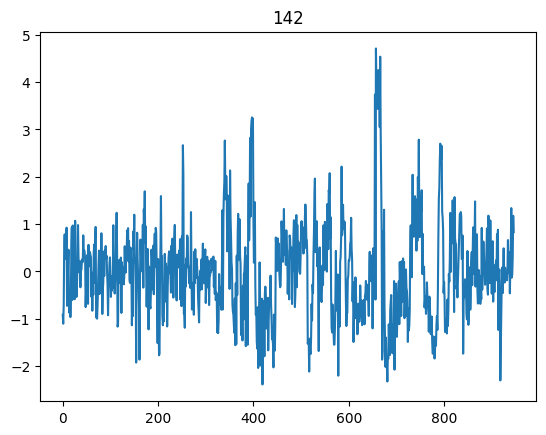

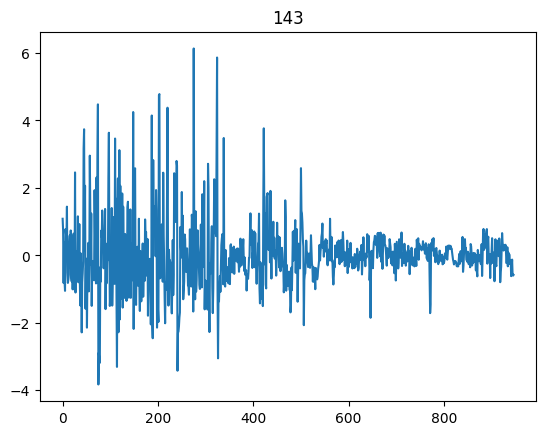

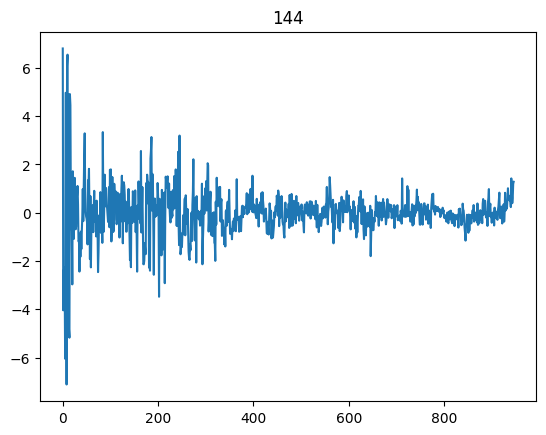

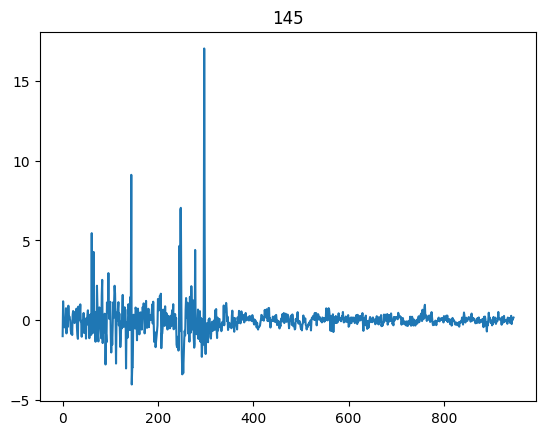

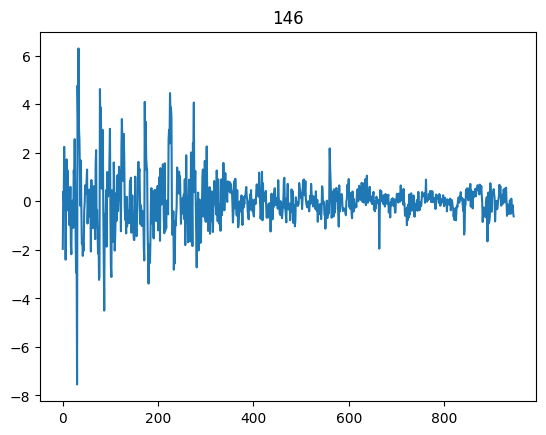

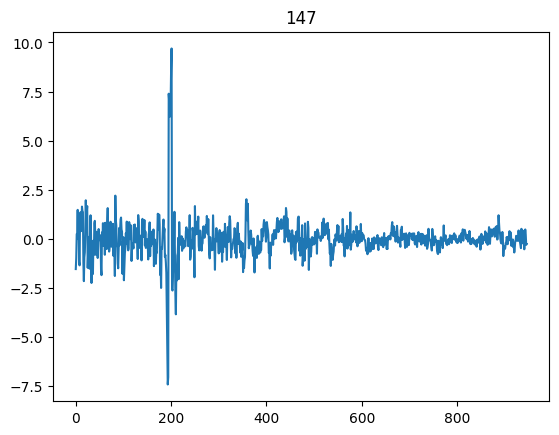

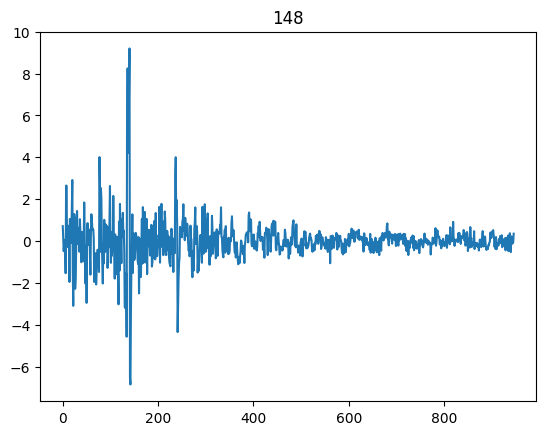

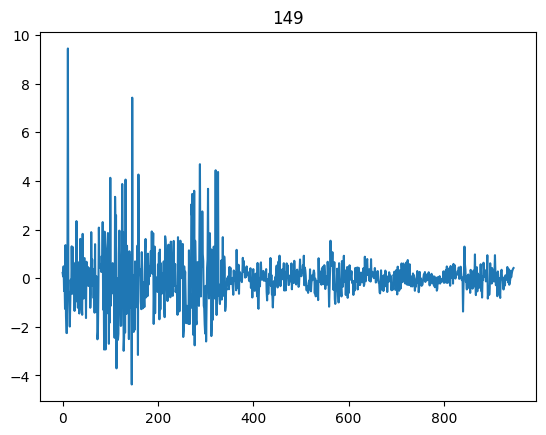

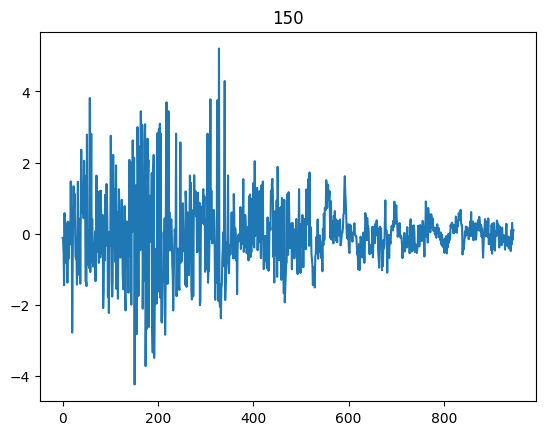

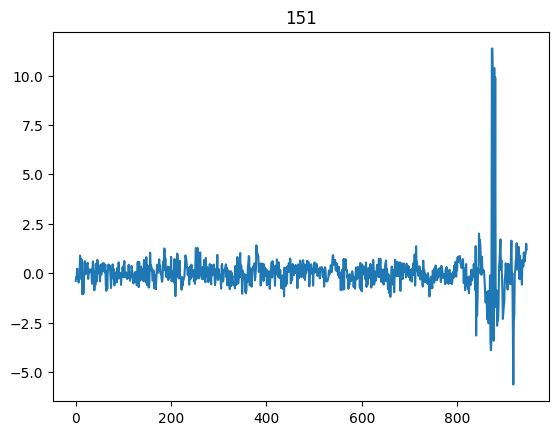

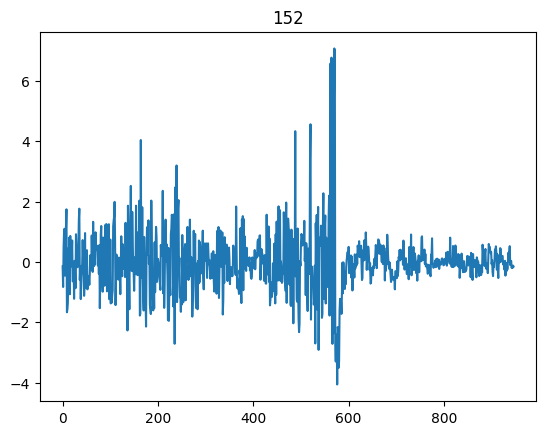

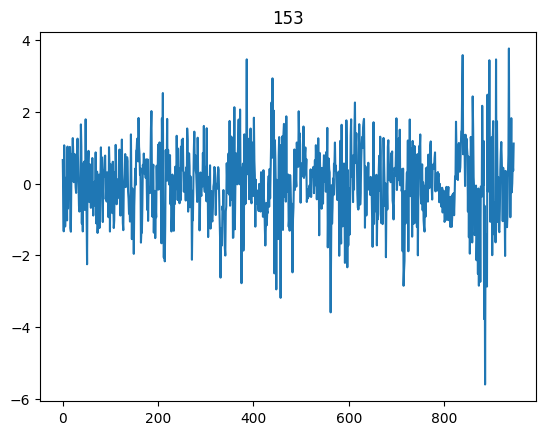

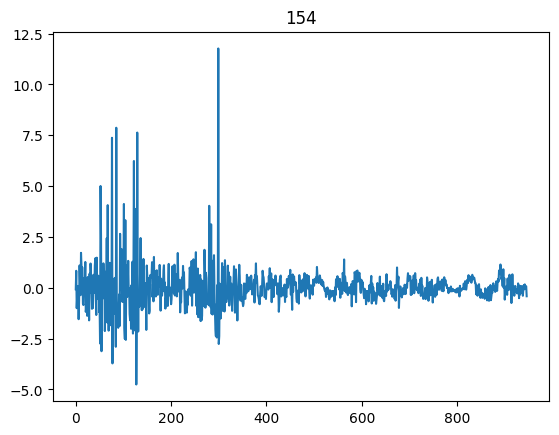

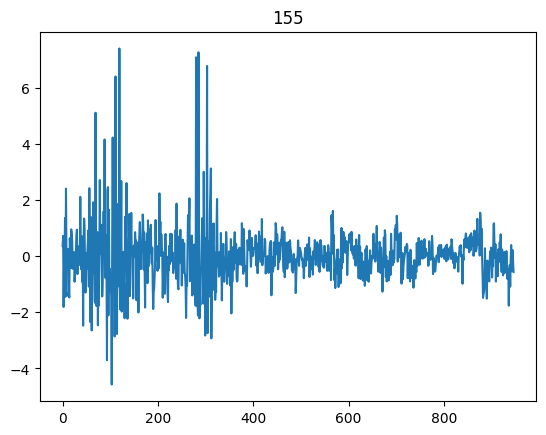

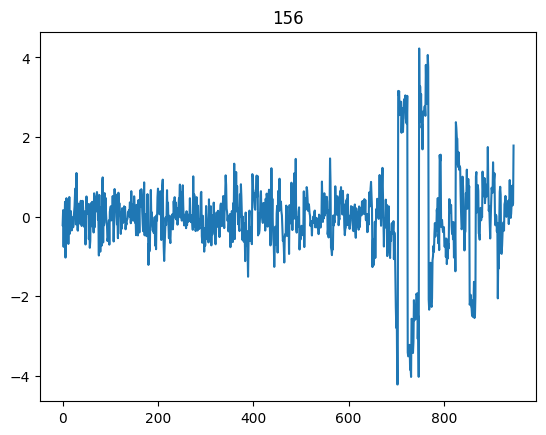

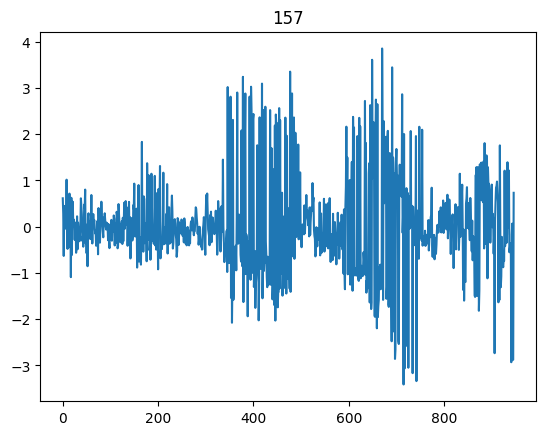

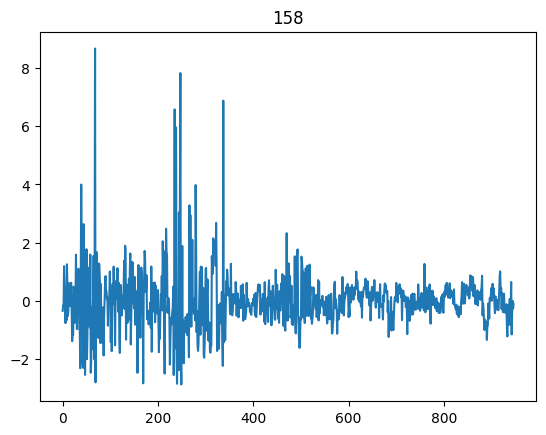

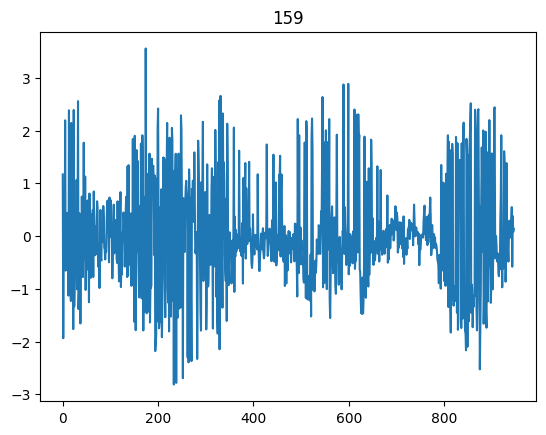

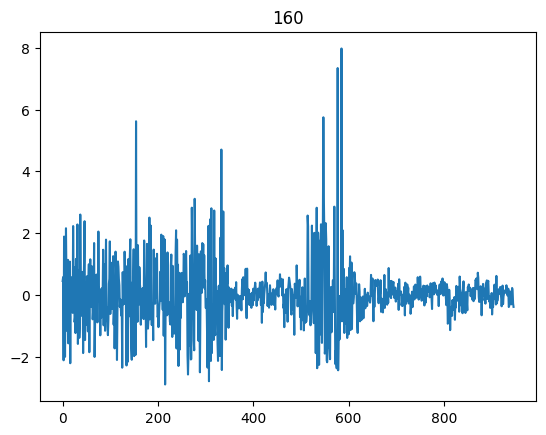

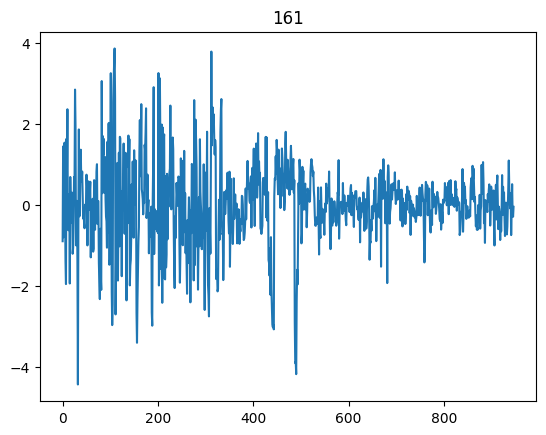

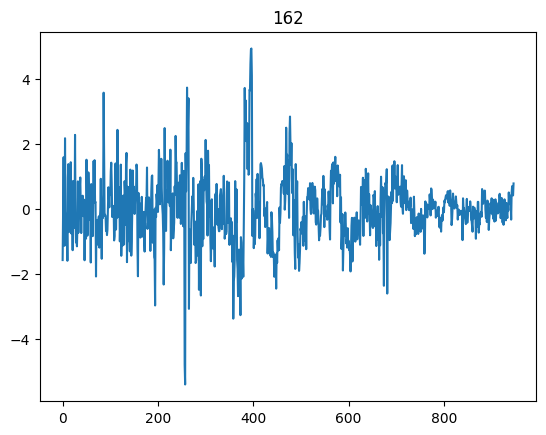

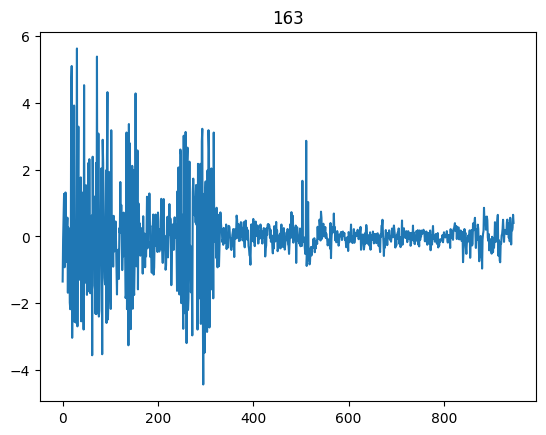

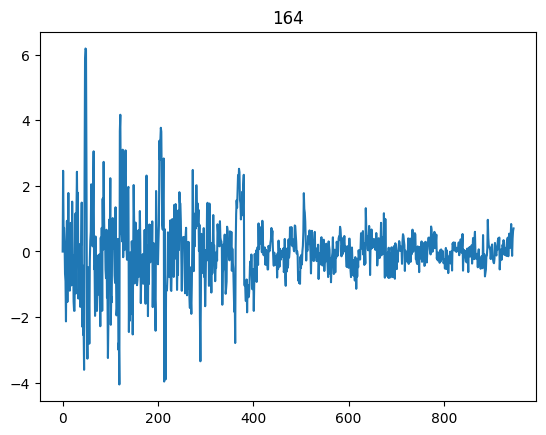

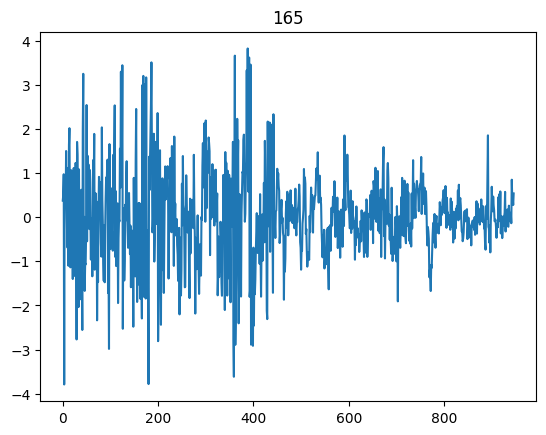

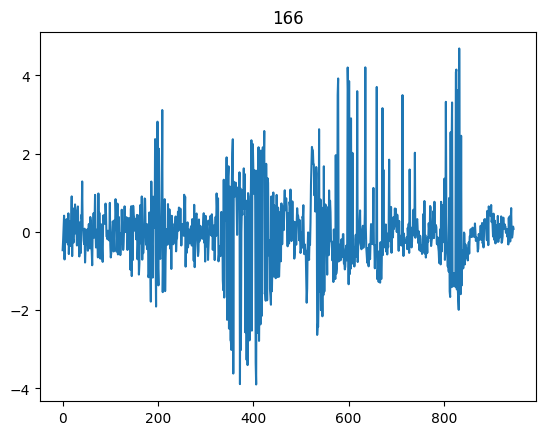

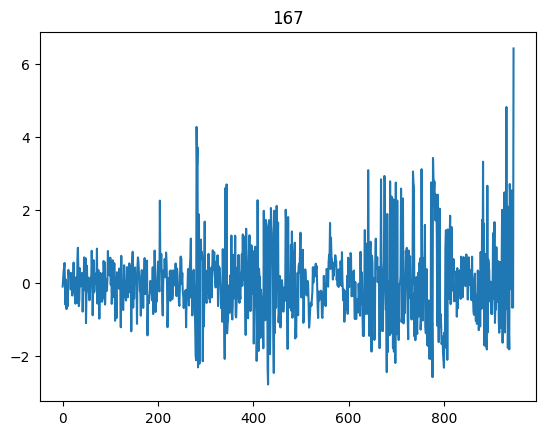

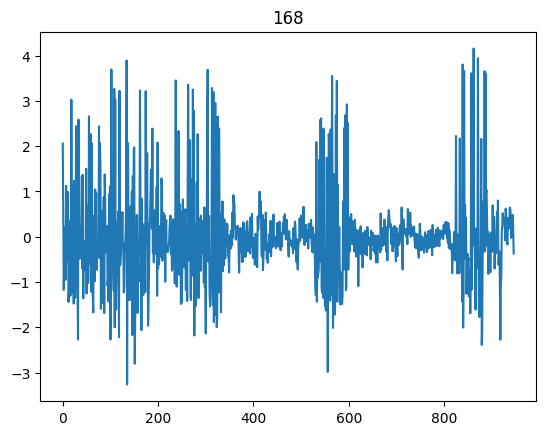

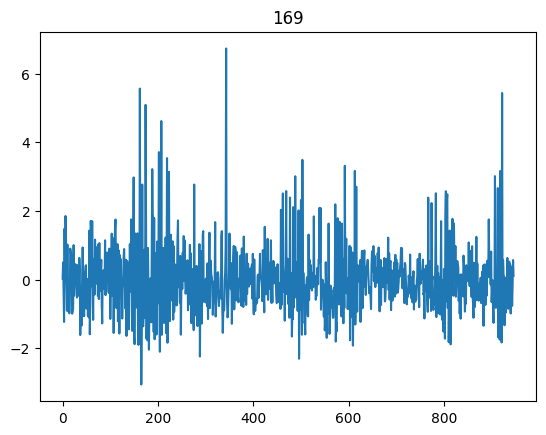

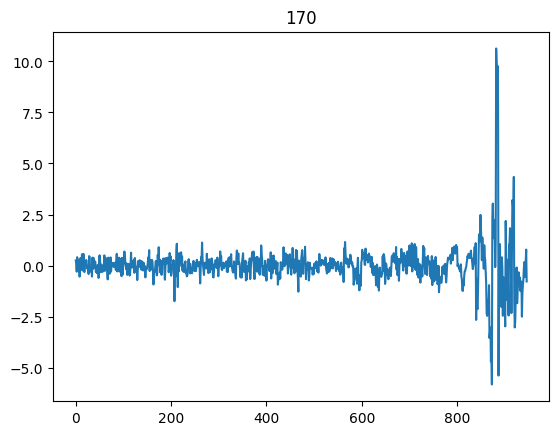

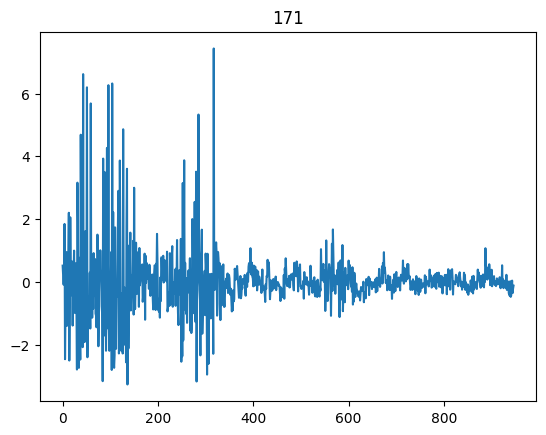

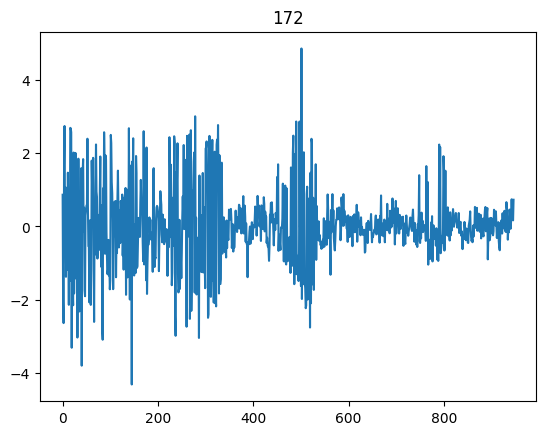

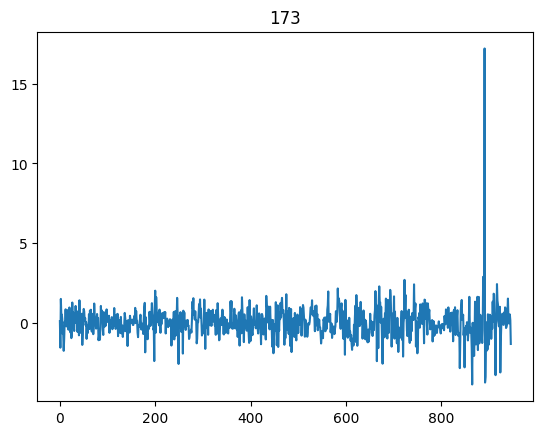

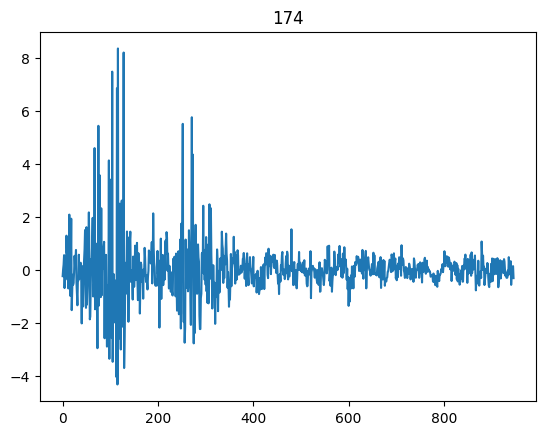

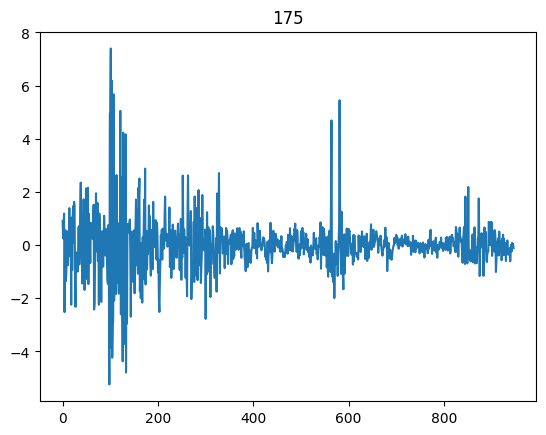

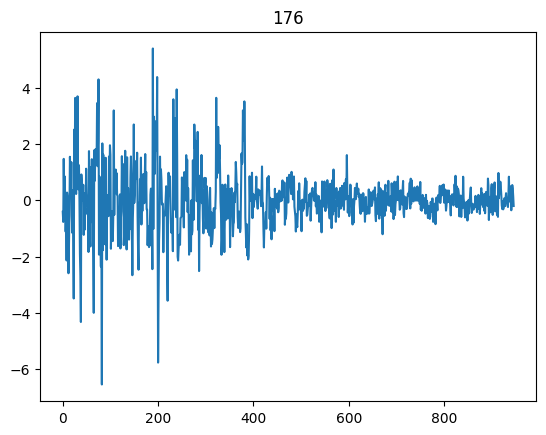

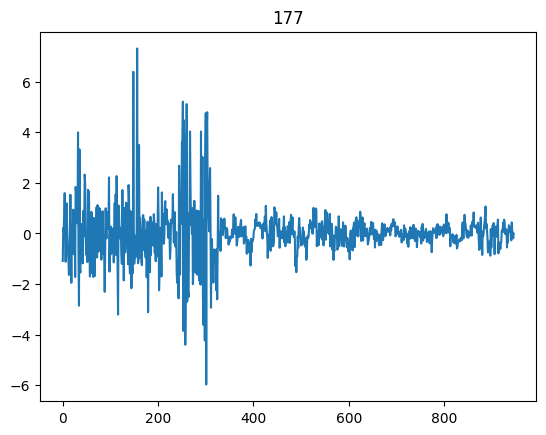

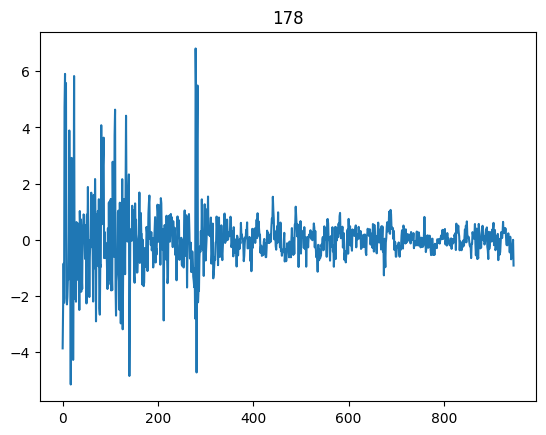

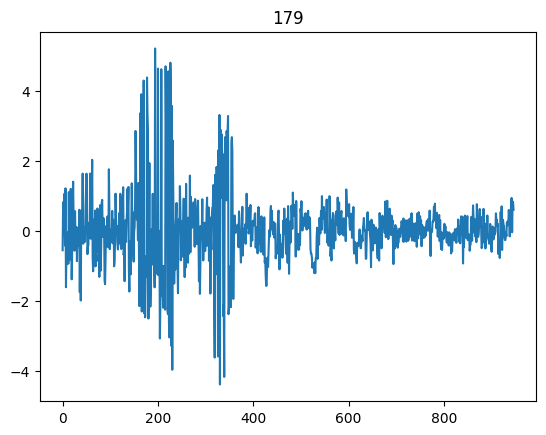

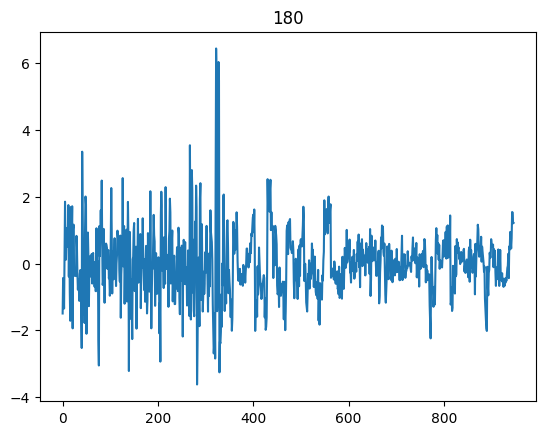

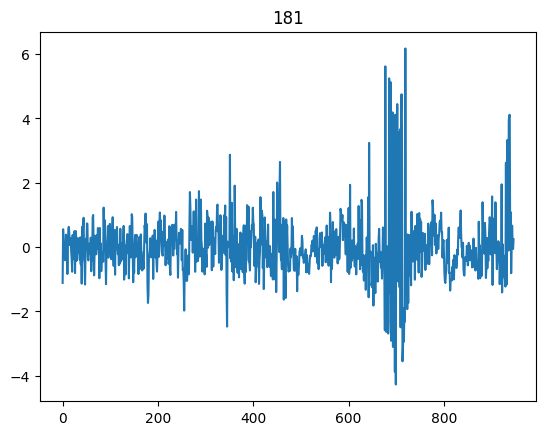

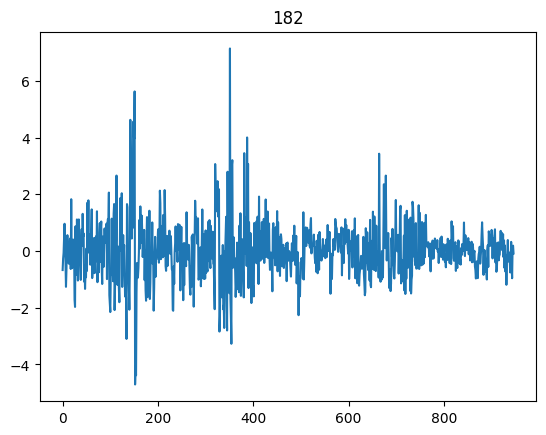

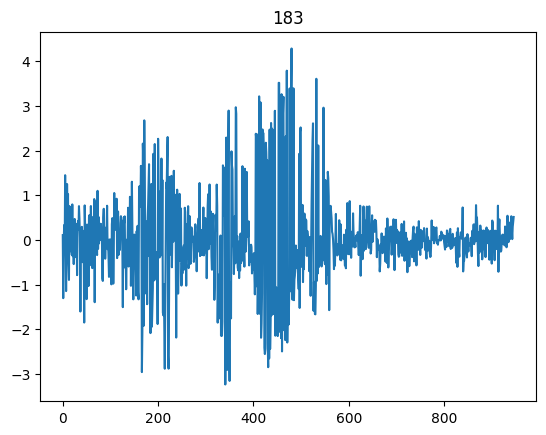

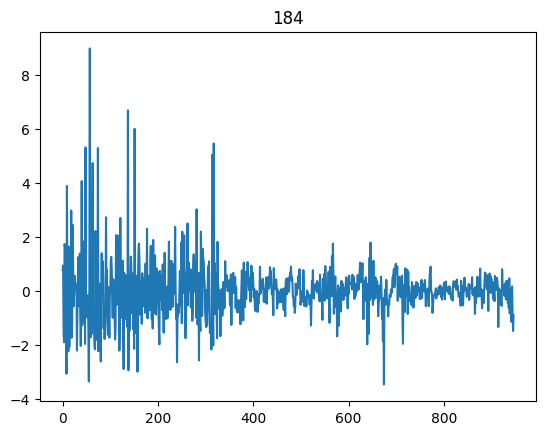

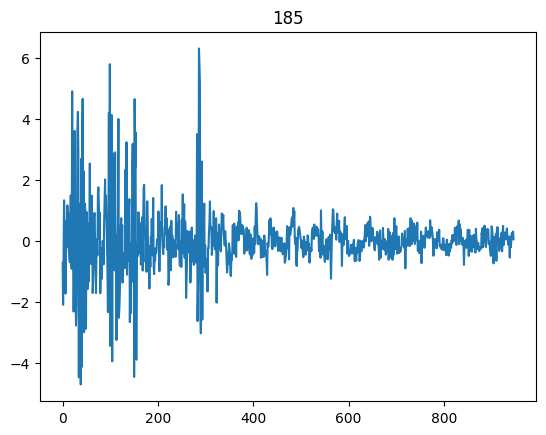

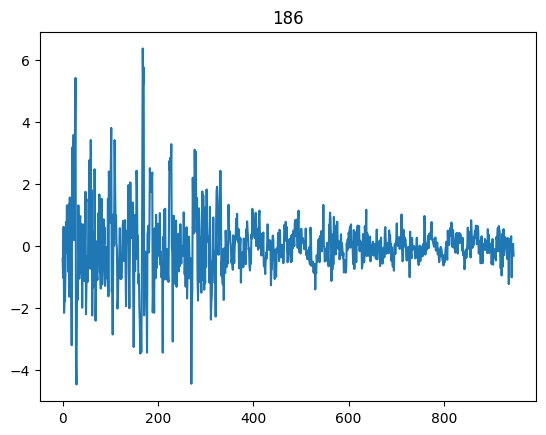

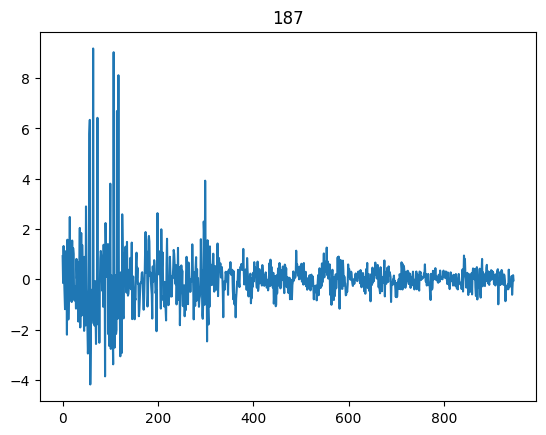

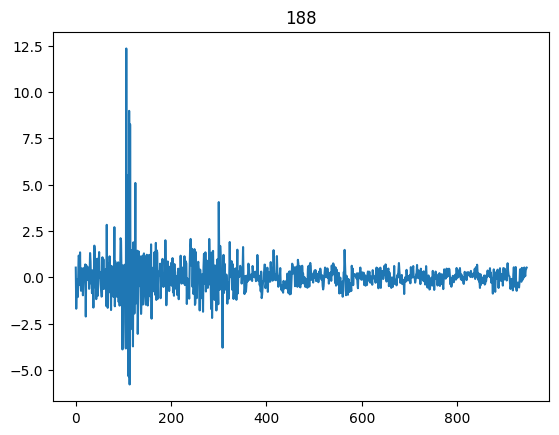

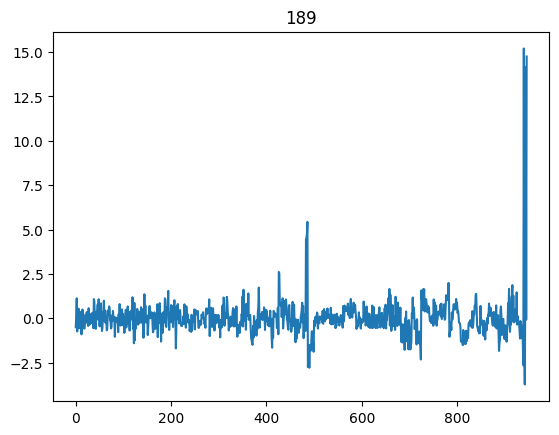

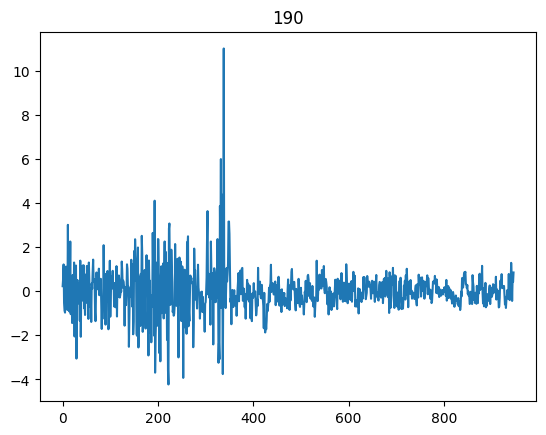

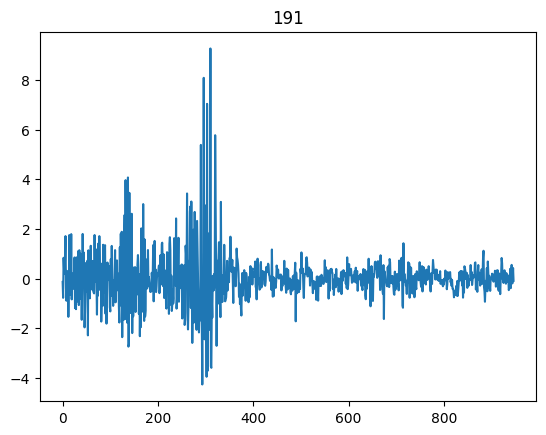

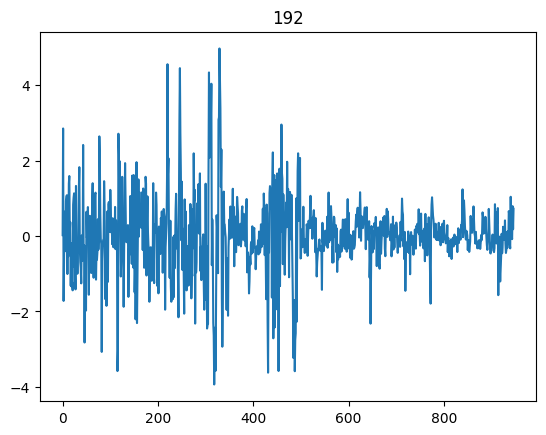

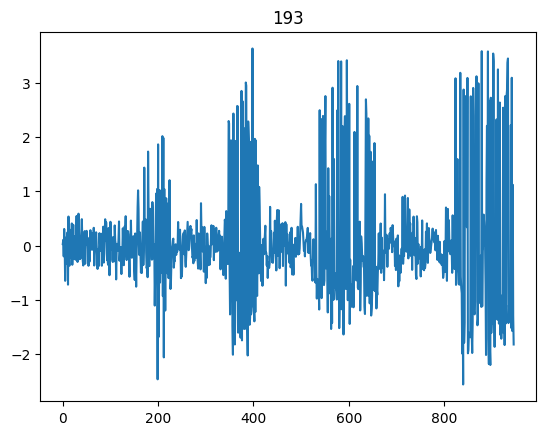

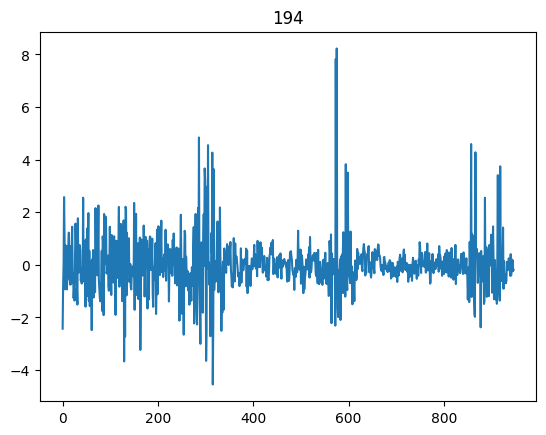

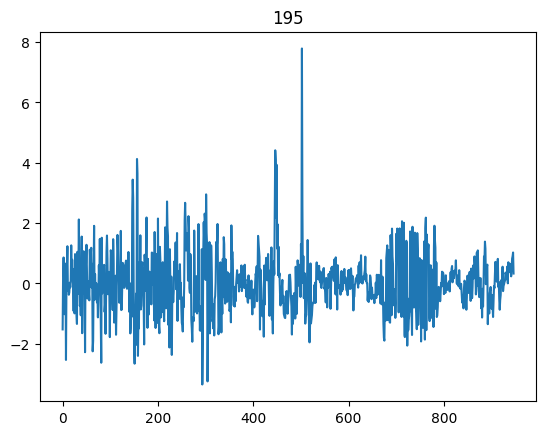

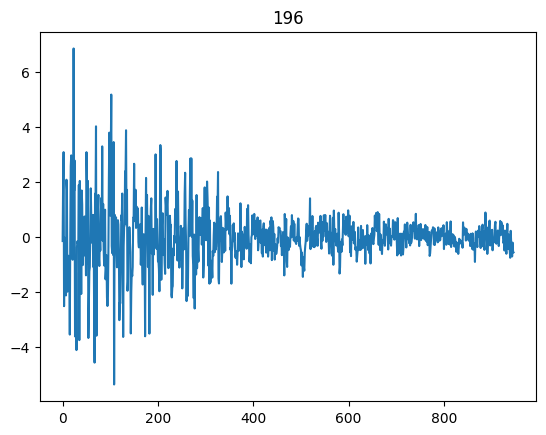

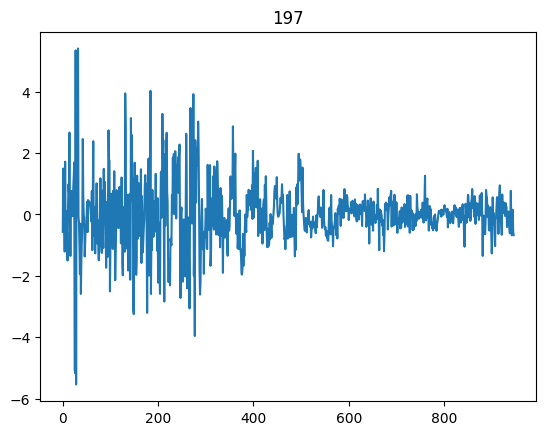

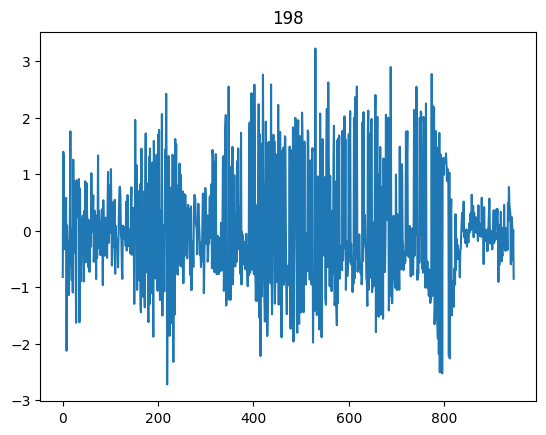

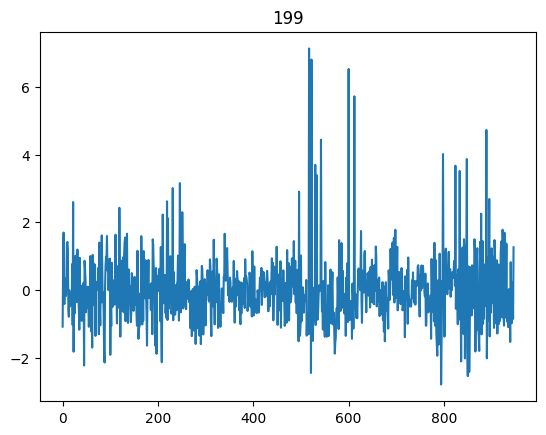

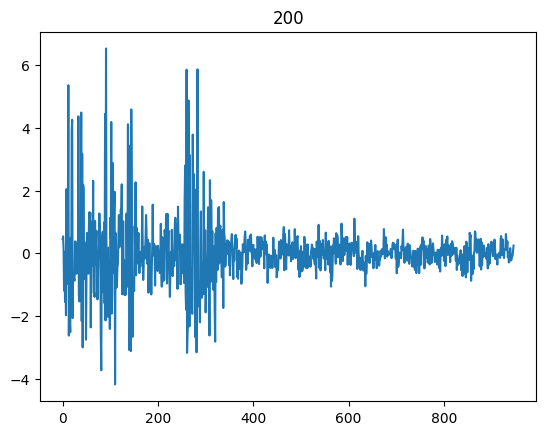

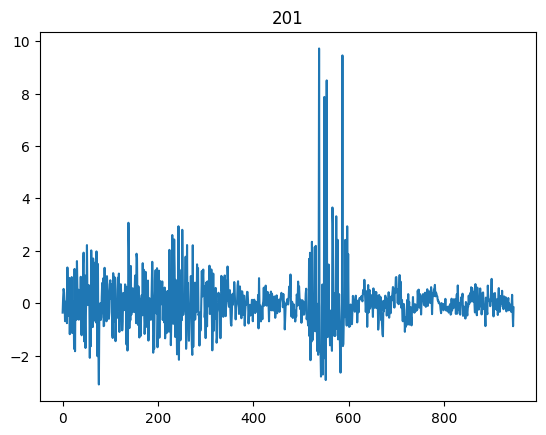

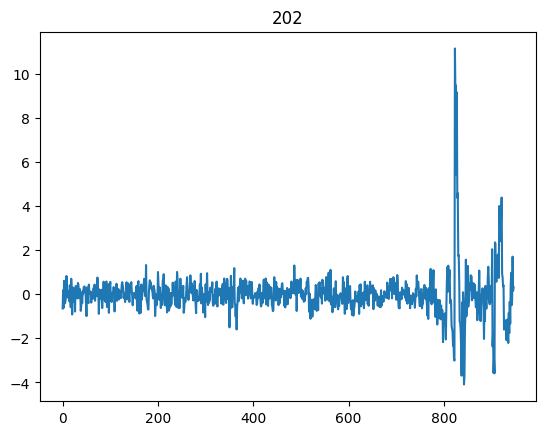

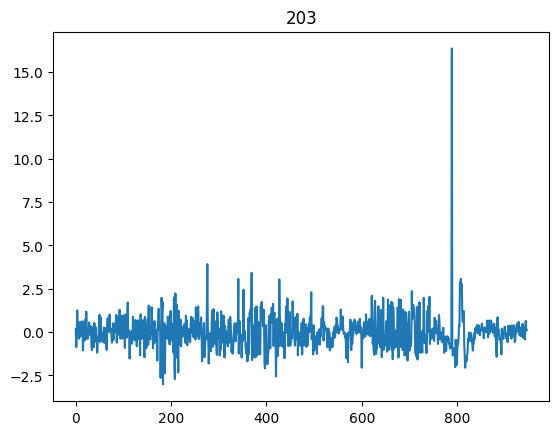

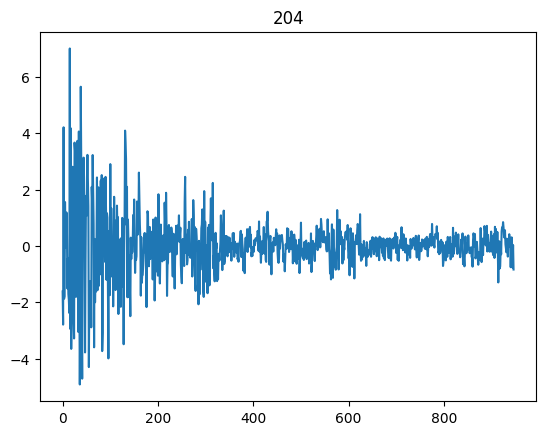

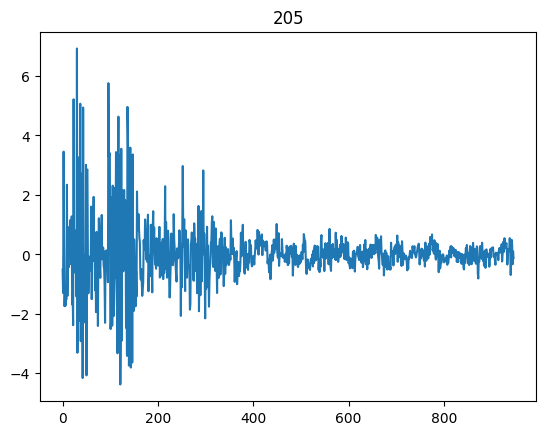

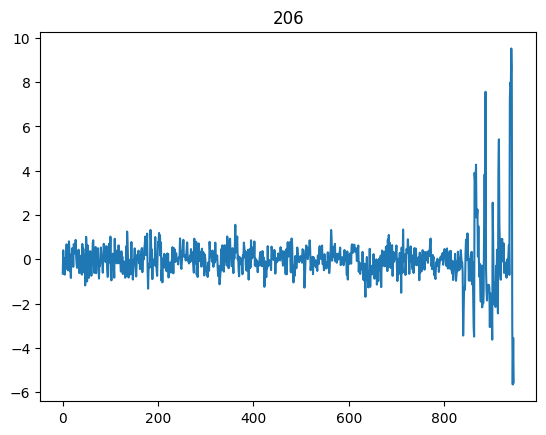

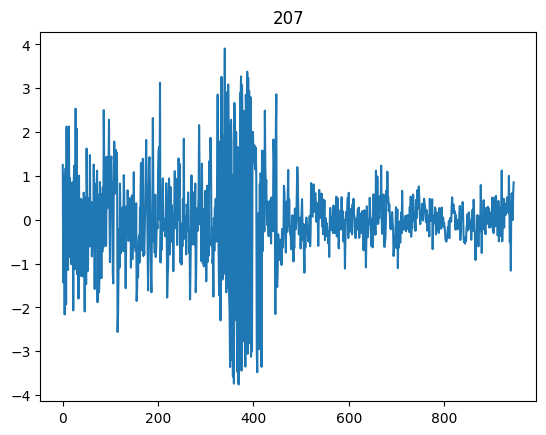

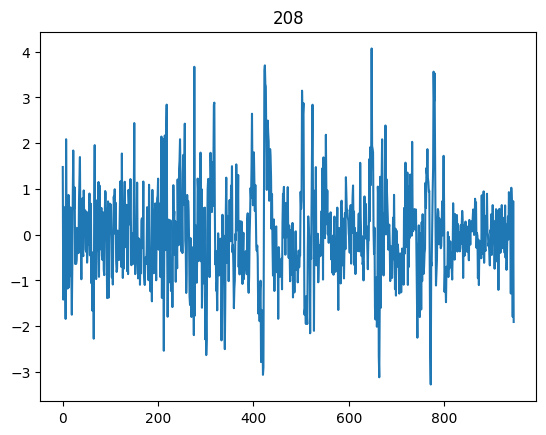

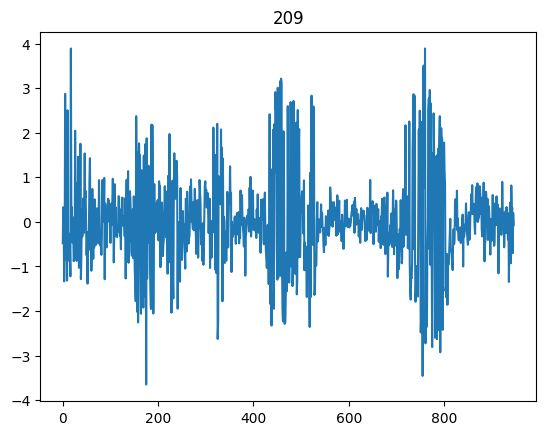

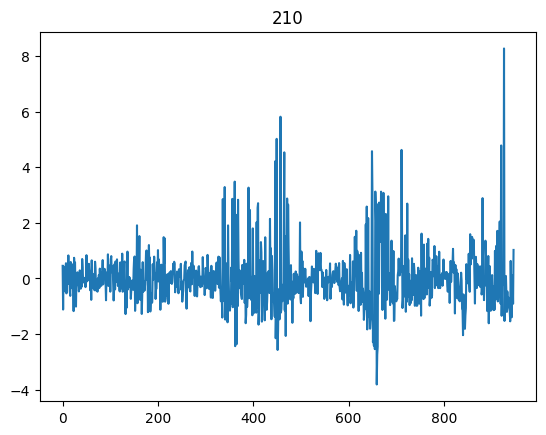

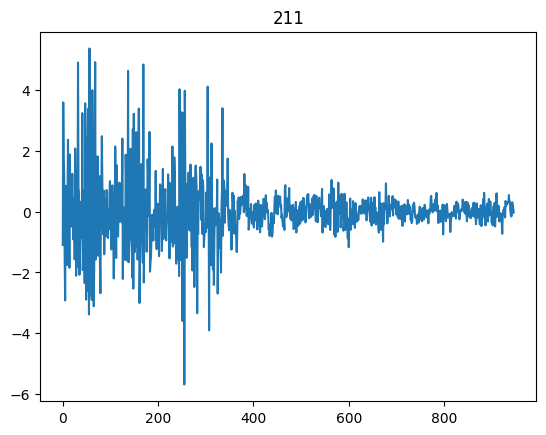

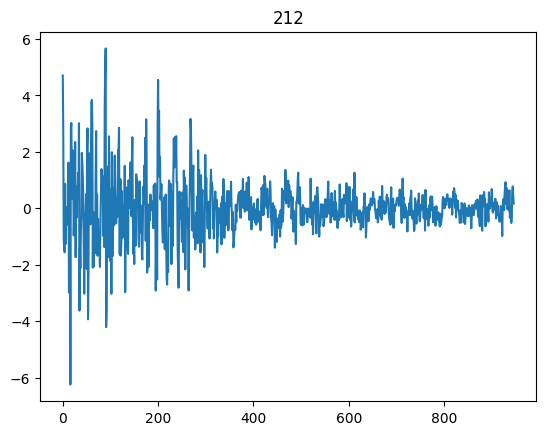

In [31]:
for i in range(len(rb.basis.data)):
    plt.plot(rb.basis.data[i])
    plt.title(i)
    plt.show()

In [32]:
proj_matrix = rb.projection_matrix

In [33]:
data_proj = rb.basis.project(y)

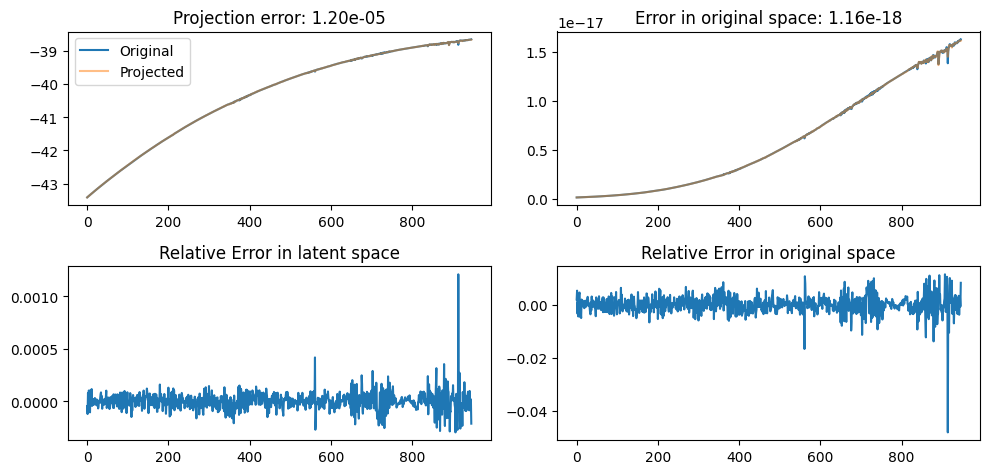

: 

In [44]:
i = np.random.randint(len(y))

projection_error = rb.basis.projection_error
squared_L2_error = projection_error(y[i])

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.title(f"Projection error: {squared_L2_error:.2e}")
plt.plot(y[i], label="Original")
plt.plot(data_proj[i], alpha=0.5, label="Projected")
plt.legend()
plt.subplot(2, 2, 2)
plt.title("Error in original space: {:.2e}".format(np.linalg.norm(np.exp(y[i]) - np.exp(data_proj[i]))))
plt.plot(np.exp(y[i]))
plt.plot(np.exp(data_proj[i]), alpha=0.5)
plt.subplot(2, 2, 3)
plt.plot((y[i] - data_proj[i])/y[i])
plt.title("Relative Error in latent space")
plt.subplot(2, 2, 4)
plt.plot((np.exp(y[i]) - np.exp(data_proj[i]))/np.exp(y[i]))
plt.title("Relative Error in original space")
plt.tight_layout()
plt.show()

In [40]:
np.save("projection_matrix_70_90.npy", proj_matrix)
np.save("basis_70_90.npy", rb.basis.data)